#Introduction
The goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal. The dataset can be found on our [Github](https://github.com/ULB-INFO-F-422/Group-12). There are 3 levels of damage:

* `1` : Low damage
* `2` : Medium amount of damage
* `3 `: Almost complete destruction

The dataset contains around 260.000 labeled samples and 39 features, with 8 categorical features, 19 binary features.





#Required packages

In [ ]:
install.packages("dplyr")
install.packages('tidyverse')
install.packages('tidymodels')
install.packages("keras")
install.packages("MLmetrics")
install.packages("randomForest")
install.packages("keras")
install.packages("xgboost")
install.packages("caret")
install.packages("mlr")
install.packages("parallel")
install.packages("parallelMap")

In [ ]:
library(rpart)
library(dplyr)
library(tidyverse)
library(tidymodels)
library(MLmetrics)

In [ ]:
library(randomForest)
library(keras)
library(xgboost)
library(mlr)
library(parallel)
library(parallelMap)

General parameters

In [ ]:
options(repr.plot.width=15, repr.plot.height=7)
set.seed(12)

#Importing dataset

In [ ]:
data_train_values<-read.csv("train_values.csv",stringsAsFactors = T)
dim(data_train_values)
data_train_labels<-read.csv("train_labels.csv")
dim(data_train_labels)
train_dataset<-merge(data_train_values,data_train_labels,by = "building_id")
dim(train_dataset)

[1] 260601     39

[1] 260601      2

[1] 260601     40

 # Data preprocessing + feature selection

Let's start by looking at what the data looks like :

In [ ]:
head(train_dataset)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,⋯,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,30,266,1224,1,25,5,2,t,r,⋯,0,0,0,0,0,0,0,0,0,2
2,8,17,409,12182,2,0,13,7,t,r,⋯,0,0,0,0,0,0,0,0,0,3
3,12,17,716,7056,2,5,12,6,o,r,⋯,0,0,0,0,0,0,0,0,0,3
4,16,4,651,105,2,80,5,4,n,r,⋯,0,0,0,0,0,0,0,0,0,2
5,17,3,1387,3909,5,40,5,10,t,r,⋯,0,0,0,0,0,0,0,0,0,2
6,25,26,1132,6645,2,0,6,6,t,w,⋯,0,0,0,0,0,0,0,0,0,1


We can see the details about the dataset with the `summary` function like the avearge per column.

In [ ]:
summary(train_dataset)

## Unique values by feature

Let's see the unique values taken by each feature.

In [ ]:
sapply(train_dataset, function(x) unique(x))

$building_id
    [1]      4      8     12     16     17     25     28     31     34     36
   [11]     39     40     42     44     46     47     50     60     61     63
   [21]     65     68     72     73     74     75     79     80     81     90
   [31]     91     95    103    107    111    113    118    123    125    126
   [41]    128    131    132    134    135    136    137    142    145    148
   [51]    151    162    163    164    169    170    171    173    177    184
   [61]    187    188    193    200    201    205    208    211    212    221
   [71]    237    246    249    250    251    252    261    267    273    276
   [81]    277    283    289    290    294    299    300    303    315    318
   [91]    328    329    332    333    338    339    346    347    358    359
  [101]    361    363    364    372    377    385    387    388    389    391
  [111]    394    395    402    403    407    421    422    433    446    453
  [121]    459    461    462    474    475    480    484    485    496    497
  [131]    501    503    505    510    514    515    517    520    521    522
  [141]    528    529    536    537    545    548    554    560    566    568
  [151]    569    576    577    581    585    586    591    595    596    599
  [161]    601    602    604    611    613    623    634    645    647    648
  [171]    649    653    655    661    665    668    673    676    684    686
  [181]    687    694    697    700    705    717    727    733    736    737
  [191]    746    752    753    754    756    758    764    765    768    774
  [201]    775    776    780    782    784    786    792    795    797    800
  [211]    806    813    819    822    823    825    835    836    856    858
  [221]    862    863    868    882    886    889    899    901    905    906
  [231]    912    913    914    919    920    927    928    933    937    940
  [241]    945    956    968    969    973    983    991   1005   1006   1011
  [251]   1013   1015   1017   1020   1026   1028   1033   1034   1035   1044
  [261]   1047   1052   1060   1063   1068   1069   1071   1073   1074   1084
  [271]   1085   1087   1090   1104   1108   1135   1136   1137   1140   1144
  [281]   1145   1146   1148   1163   1164   1167   1169   1175   1177   1180
  [291]   1182   1183   1191   1192   1193   1198   1199   1206   1208   1211
  [301]   1213   1220   1225   1228   1229   1230   1236   1237   1243   1246
  [311]   1255   1257   1258   1261   1277   1278   1279   1282   1284   1288
  [321]   1294   1297   1307   1309   1312   1317   1319   1321   1323   1324
  [331]   1325   1328   1329   1336   1337   1339   1344   1346   1351   1352
  [341]   1359   1365   1366   1368   1371   1376   1386   1392   1393   1396
  [351]   1400   1403   1404   1406   1407   1409   1422   1423   1425   1428
  [361]   1430   1433   1434   1436   1439   1444   1456   1459   1460   1467
  [371]   1476   1486   1496   1497   1498   1499   1506   1511   1524   1526
  [381]   1528   1533   1541   1545   1556   1560   1563   1567   1568   1569
  [391]   1570   1585   1592   1595   1598   1600   1603   1607   1611   1615
  [401]   1619   1625   1626   1627   1628   1634   1637   1638   1641   1647
  [411]   1651   1658   1661   1670   1687   1694   1705   1707   1713   1715
  [421]   1717   1729   1736   1747   1750   1760   1762   1763   1771   1776
  [431]   1782   1786   1787   1791   1793   1796   1798   1800   1805   1810
  [441]   1812   1826   1836   1841   1846   1852   1855   1856   1862   1865
  [451]   1868   1875   1876   1880   1881   1883   1889   1894   1897   1921
  [461]   1923   1926   1934   1935   1936   1937   1938   1948   1951   1961
  [471]   1962   1967   1969   1975   1982   1986   1995   1997   2001   2009
  [481]   2014   2017   2021   2024   2027   2028   2031   2039   2040   2043
  [491]   2044   2051   2054   2055   2064   2065   2070   2071   2074   2078
  [501]   2080   2087   2093   2095   2096   2098   2108   2113   2116   2118
  [511]  

Count distinct values by feature.

The feature `building_id` contains a huge number of unique values. It's a unique and random identifier for each building so we will just drop this collumn because this feature will not be useful to predict the damage grade of a building.

In [ ]:
lapply(train_dataset, function(x) n_distinct(x)) %>% str()

List of 40
 $ building_id                           : int 260601
 $ geo_level_1_id                        : int 31
 $ geo_level_2_id                        : int 1414
 $ geo_level_3_id                        : int 11595
 $ count_floors_pre_eq                   : int 9
 $ age                                   : int 42
 $ area_percentage                       : int 84
 $ height_percentage                     : int 27
 $ land_surface_condition                : int 3
 $ foundation_type                       : int 5
 $ roof_type                             : int 3
 $ ground_floor_type                     : int 5
 $ other_floor_type                      : int 4
 $ position                              : int 4
 $ plan_configuration                    : int 10
 $ has_superstructure_adobe_mud          : int 2
 $ has_superstructure_mud_mortar_stone   : int 2
 $ has_superstructure_stone_flag         : int 2
 $ has_superstructure_cement_mortar_stone: int 2
 $ has_superstructure_mud_mortar_brick   

## Damage grade distribution

Concerning the balance of the classes, we can see that the dataset is not balanced. **Class 2** is over-represented with approximately 56% of the dataset belonging to **class 2** against only 10% for **class 1** and 34% for **class 3**. One solution to this problem is to use the correct metric. In our case we use F1-score, this metric keeps the balance between precision and recall. F1-score is perfect for unbalanced dataset.


     1      2      3 
 25124 148259  87218 

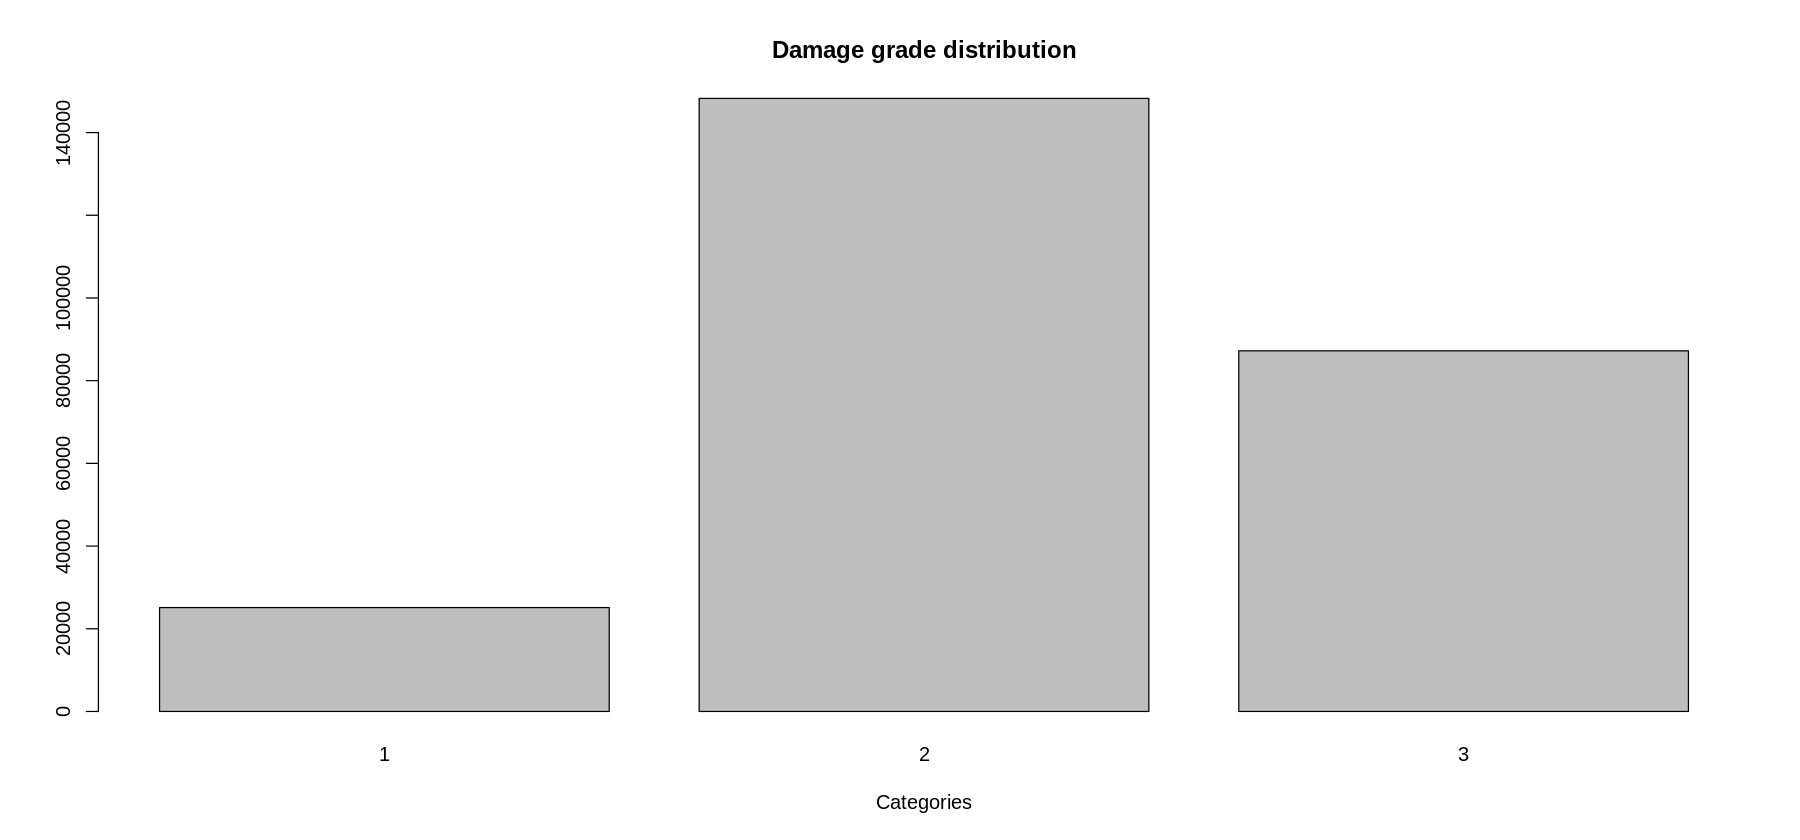

In [ ]:
table(train_dataset$damage_grade)
barplot(table(train_dataset$damage_grade), main="Damage grade distribution", xlab="Categories")

## Building distribution by main region

Let's see the number of buildings there are by main regions.

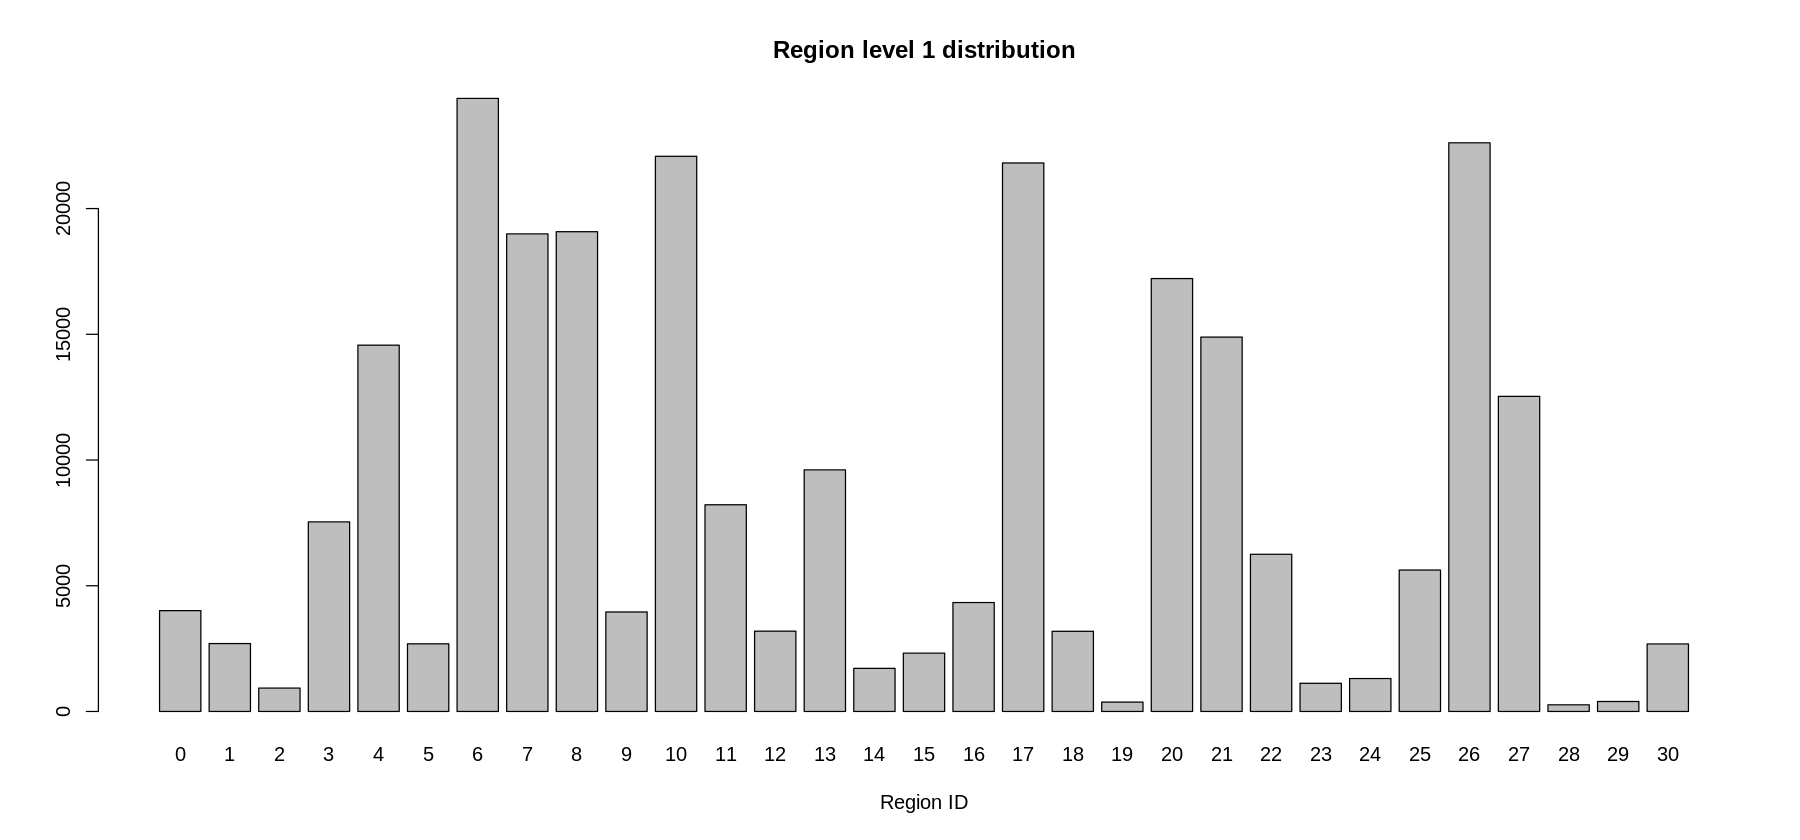

In [ ]:
barplot(table(train_dataset$geo_level_1_id), main="Region level 1 distribution", xlab="Region ID")

##Looking at missing values
One good thing is that there is no missing data in the dataset

In [ ]:
lapply(train_dataset, function(x) sum(is.na(x))) %>% str()

List of 40
 $ building_id                           : int 0
 $ geo_level_1_id                        : int 0
 $ geo_level_2_id                        : int 0
 $ geo_level_3_id                        : int 0
 $ count_floors_pre_eq                   : int 0
 $ age                                   : int 0
 $ area_percentage                       : int 0
 $ height_percentage                     : int 0
 $ land_surface_condition                : int 0
 $ foundation_type                       : int 0
 $ roof_type                             : int 0
 $ ground_floor_type                     : int 0
 $ other_floor_type                      : int 0
 $ position                              : int 0
 $ plan_configuration                    : int 0
 $ has_superstructure_adobe_mud          : int 0
 $ has_superstructure_mud_mortar_stone   : int 0
 $ has_superstructure_stone_flag         : int 0
 $ has_superstructure_cement_mortar_stone: int 0
 $ has_superstructure_mud_mortar_brick   : int 0
 $ has_su

##One hot encoding

The dataset contains some features that are not numeric. It contains 8 categorical features.
We will do one-hot encoding on these features with the recipes package.

The features `geo_level_1_id`, `geo_level_2_id` and `geo_level_3_id` are features that represent a certain part or region of Nepal.
These features are already labelled and we will not do one-hot encoding on these features because they contain too many unique values (as seen previously). We will have too much features and it will make our problem more complexe.

In [ ]:
train_dataset <- recipe(damage_grade ~ ., train_dataset) %>%

  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)

##Initialisation of the final dataset

In [ ]:
dataset <- data.frame(train_dataset)

# Shuffle the dataset randomly.
building_idx <- sample(1:nrow(dataset))
dataset <- dataset[building_idx,]

X<-dataset[,setdiff(colnames(dataset),"damage_grade")]
Y<-dataset[,"damage_grade"]

colnames(X) <- gsub(colnames(X),pattern = " ", replacement = "_")
colnames(X) <- gsub(colnames(X),pattern = "-", replacement = "_")

N<-nrow(X)    #Number of rows
n<-ncol(X)    #Number of features

##Feature selection

In this part we will implement two types of feature selection:

*   **Filter methods**: This method is an unsupervised "algorithm". Unlike Wrapper methods, the selection of features is completely independant of any kind of learning algorithms. In this part we will implement 2 methods such as *PCA* which selects the variables by classifying them via compression techniques and the *mRMR* which maximizes the relevance of the features and minimizes the redundancy.

*   **Wrapper Methods**: In this method we use a subset of features and train our model using them. Based on the deductions we draw from the previous model, we choose to either add or remove features from the subset. In this part we will focus only on the *forward selection* method .As this method is a supervised "algorithm", it's computational time is expensive. Unfortunately, we give up the idea of doing forward selection because it takes a lot of time.






##Useless features
Some features can be removed from the dataset just by analysing the dataset.These are the features:

*  `building_id` : This is a unique id for each building



In [ ]:
drops <- c("building_id")
X<-X[ , !(names(X) %in% drops)]

N<-nrow(X)    #Number of rows
n<-ncol(X)    #Number of features

 ## mRMR (minimum Redundancy Maximum Relevance)

mRMR is a feature selection technique that seeks to find a subset of relevant (based on to the correlation with the output) and non-redundant features. It can be used to reduce the dimensionality of data and improve the performance of machine learning models.

In [ ]:
# Initialization : No variables are selected and all the variables are candidates
selected<-c()
candidates<-1:n
# Computing the correlation between input variables and output variable on the training set
mutual_info <- -0.5 * log(1 - cor(X,Y)^2)
#mRMR ranks the variables by taking account not only the correlation with the output, but also by avoiding redudant variables
for (j in 1:n) {
    redundancy_score<-numeric(length(candidates))

    if (length(selected)>0) {

        mutual_info_selected_candidates <- -0.5 * log(1 - cor(X[,selected,drop=F],X[,candidates,drop=F])^2)
        #Compute the mean mutual_info for each candidate variable, across the selected variables
        redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
    }

    # mRMR: minimum Redundancy Maximum Relevancy
    mRMR_score<-mutual_info[candidates]-redundancy_score

    # Select the candidate variable that maximises the mRMR score
    selected_current<-candidates[which.max(mRMR_score)]
    selected<-c(selected,selected_current)

    # Remove the selected variables from the candidates
    candidates<-setdiff(candidates,selected_current)
}

Here we are going to choose arbitrary the 35 first features.

In [ ]:
selected
colnames(X)[selected]

[1] 66 62 10  4 58 51 19 47  9 17 34 31 16 23 13 18 38 30 39 68 11 24 65 57 44
[26]  2 36 56 55 46 27 42 22  1  5 26 63 43 41 28 29  3 25 32 45 15  6 52 35 21
[51] 60  8 67 64 54 49 14 48 53 12 59 20 40 33  7 61 50 37

[1] "foundation_type_r"                     
 [2] "roof_type_q"                           
 [3] "has_superstructure_stone_flag"         
 [4] "count_floors_pre_eq"                   
 [5] "ground_floor_type_v"                   
 [6] "position_t"                            
 [7] "count_families"                        
 [8] "plan_configuration_u"                  
 [9] "has_superstructure_mud_mortar_stone"   
[10] "has_superstructure_rc_engineered"      
[11] "legal_ownership_status_w"              
[12] "legal_ownership_status_a"              
[13] "has_superstructure_rc_non_engineered"  
[14] "has_secondary_use_rental"              
[15] "has_superstructure_cement_mortar_brick"
[16] "has_superstructure_other"              
[17] "plan_configuration_a"                  
[18] "has_secondary_use_other"               
[19] "plan_configuration_c"                  
[20] "foundation_type_w"                     
[21] "has_superstructure_cement_mortar_stone"
[22] "has_secondary_use_institution"         
[23] "foundation_type_i"                     
[24] "ground_floor_type_m"                   
[25] "plan_configuration_o"                  
[26] "geo_level_2_id"                        
[27] "land_surface_condition_o"              
[28] "ground_floor_type_f"                   
[29] "other_floor_type_x"                    
[30] "plan_configuration_s"                  
[31] "has_secondary_use_health_post"         
[32] "plan_configuration_m"                  
[33] "has_secondary_use_hotel"               
[34] "geo_level_1_id"                        
[35] "age"                                   
[36] "has_secondary_use_industry"            
[37] "roof_type_x"                           
[38] "plan_configuration_n"                  
[39] "plan_configuration_f"                  
[40] "has_secondary_use_gov_office"          
[41] "has_secondary_use_use_police"          
[42] "geo_level_3_id"                        
[43] "has_secondary_use_school"              
[44] "legal_ownership_status_r"              
[45] "plan_configuration_q"                  
[46] "has_superstructure_bamboo"             
[47] "area_percentage"                       
[48] "other_floor_type_j"                    
[49] "land_surface_condition_n"              
[50] "has_secondary_use_agriculture"         
[51] "ground_floor_type_z"                   
[52] "has_superstructure_adobe_mud"          
[53] "foundation_type_u"                     
[54] "foundation_type_h"                     
[55] "other_floor_type_s"                    
[56] "position_o"                            
[57] "has_superstructure_timber"             
[58] "position_j"                            
[59] "other_floor_type_q"                    
[60] "has_superstructure_mud_mortar_brick"   
[61] "ground_floor_type_x"                   
[62] "has_secondary_use"                     
[63] "plan_configuration_d"                  
[64] "legal_ownership_status_v"              
[65] "height_percentage"                     
[66] "roof_type_n"                           
[67] "position_s"                            
[68] "land_surface_condition_t"

In [ ]:
top_features <- c(selected[1:35])
X_mrmr <- X[,top_features,drop=F] #mrmr dataset with the top-35 features
N_mrmr <- nrow(X_mrmr)    #Number of rows
n_mrmr <- ncol(X_mrmr)    #Number of features

## PCA (Principal Component Analysis)

PCA is a unsupervised technique that reduces the dimensionality of a dataset and preserve the maximum variation.

The library ***stats*** provide a function called ***prcomp*** which use singular value decomposition(SVD) on the data matrix to perform the PCA analysis.

In [ ]:
result_pca <-prcomp(X,retx=T,scale = TRUE)

The `summary` function allows to see in detail for each component the standard deviation and the proportion of  variance explained by each component. When we see these 69 components, we have to decide how many to take for our feature selection? We have decided to set a threshold on the proportion of variance to be explained, so we will choose the first *k* components such that for a threshold **α=0.90** :

\begin{equation*}
 \frac{Λ_1 +Λ_2 +...+Λ_k}{\sum_{j=1}^n Λ_j} >α
\end{equation*} Where $λ_j$ is the jth largest eigenvalue.

The output of the `summary` function shows that we have to take the first ***46 components*** to explain **90%** of the variance. We can see this in the ***Cumulative Proportion*** part.

In [ ]:
summary(result_pca)

Importance of components:
                           PC1     PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.46055 1.83827 1.5536 1.46394 1.43162 1.40497 1.36440
Proportion of Variance 0.08903 0.04969 0.0355 0.03152 0.03014 0.02903 0.02738
Cumulative Proportion  0.08903 0.13873 0.1742 0.20574 0.23588 0.26491 0.29229
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.31477 1.28377 1.26637 1.20995 1.16470 1.13303 1.09237
Proportion of Variance 0.02542 0.02424 0.02358 0.02153 0.01995 0.01888 0.01755
Cumulative Proportion  0.31771 0.34194 0.36553 0.38706 0.40701 0.42588 0.44343
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.05954 1.04284 1.02957 1.02729 1.02221 1.01763 1.01268
Proportion of Variance 0.01651 0.01599 0.01559 0.01552 0.01537 0.01523 0.01508
Cumulative Proportion  0.45994 0.47593 0.49152 0.50704 0.52241 0.53764 0.55272
                         PC22 

We can also manually compute the proportion of variance explained in order to display a graph. We get the same results as the `summary` function.

In [ ]:
var <-result_pca$sdev^2
proportion_var <- var/sum(var)

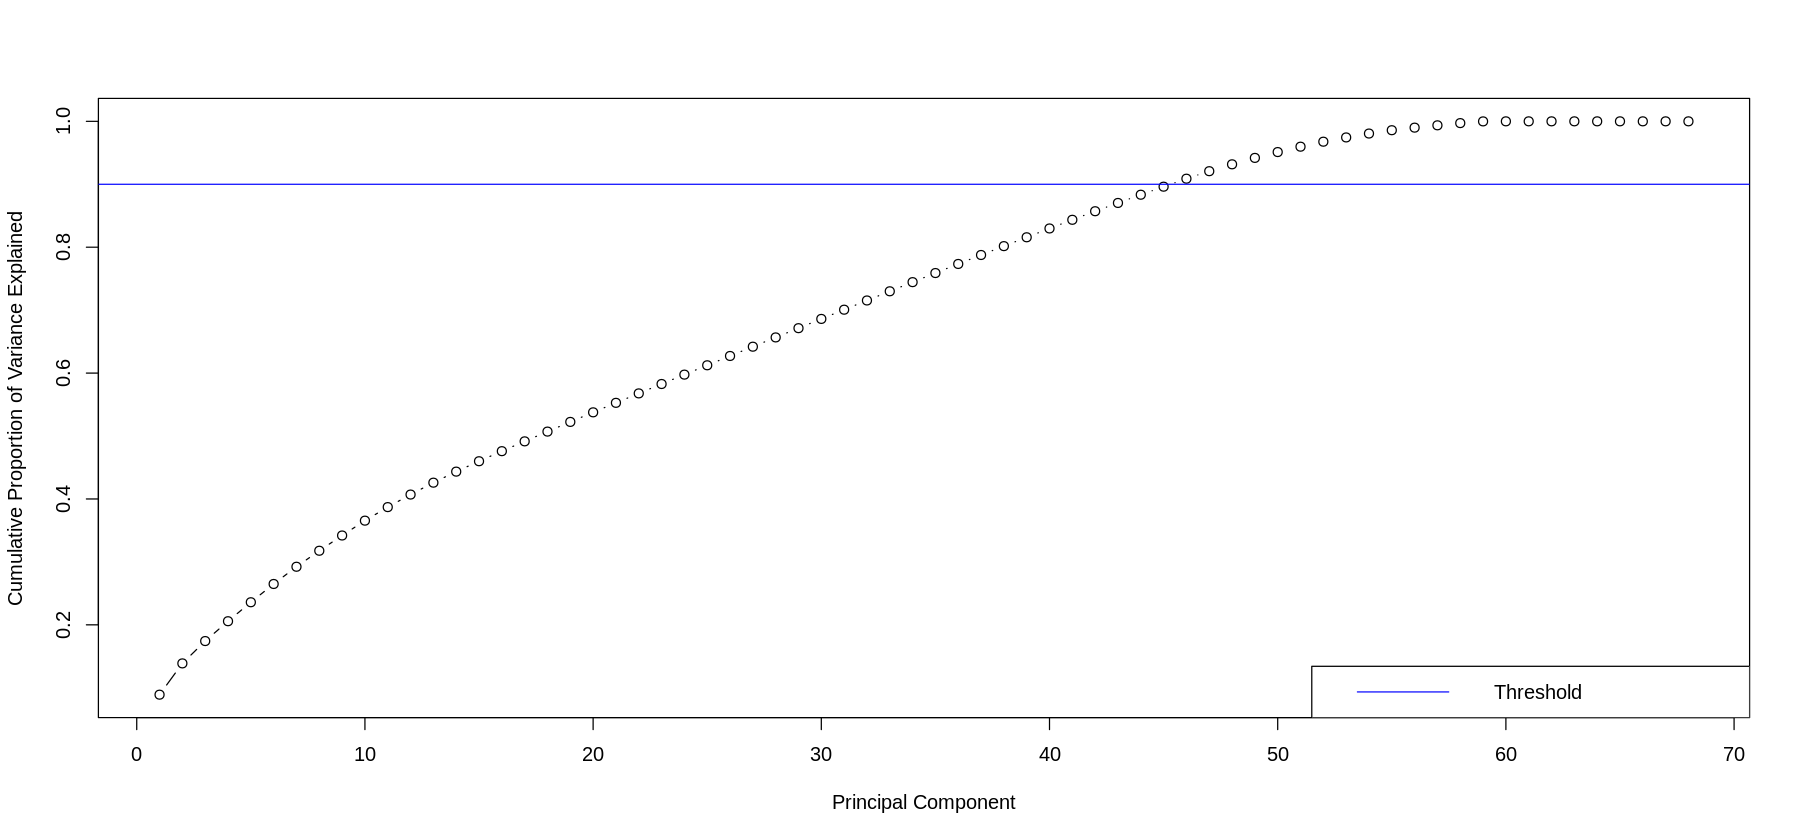

In [ ]:
plot(cumsum(proportion_var), xlab = "Principal Component",
              ylab = "Cumulative Proportion of Variance Explained",
              type = "b")

abline(h=0.9, col="blue")
  legend("bottomright", lty = c(1),
        col = c("blue"),
        legend = c("Threshold"))

To finish with PCA, we have to take the first ***46 components*** in order to respect our threshold. The function below allows us to have the dataset transformed by PCA.

In [ ]:
X_pca<-data.frame(result_pca$x)[,1:46]
head(X_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7575099,3.0035301,-1.6337407,1.0051745,0.9617895,-1.0167459,-0.06856401,-0.2434205,0.04542102,-0.9979597,⋯,-0.686075997,-1.1549266,-0.4362503,0.5442039,0.19275810,0.9789563,0.352980861,0.09142538,1.10775962,-1.8421926
2,1.0370250,-0.5569883,-0.8445338,-0.3526072,0.5183294,-0.3520650,-0.20660522,0.2752224,1.07920099,0.1676715,⋯,0.269513247,-0.3095300,0.2934806,-0.3859182,0.05717146,0.7241786,-0.002902079,0.37699778,0.40450709,-0.1765440
3,1.0344441,-0.2232775,-0.4172413,-2.1863249,-1.3931670,1.7740117,0.65898224,1.2042071,-0.91308030,0.5735286,⋯,-0.310298127,0.1651766,-0.2531382,-0.2472047,0.54833749,0.1593561,0.204639966,0.37130416,0.50280523,-0.5270384
4,1.7751459,0.1258359,-1.4022907,0.2628687,-1.8623173,1.3475684,1.26855149,1.2154183,0.26500224,0.2028598,⋯,-0.409905100,-0.6543144,-0.2450379,0.4663483,-0.60639264,-0.1957783,0.218430895,-0.43559442,-0.67580833,0.5530295
5,0.2672767,-5.6667382,3.2031114,2.3002486,1.5876970,-0.2839783,1.72548660,-0.5751619,1.58614995,0.6835199,⋯,-0.657280772,0.9784979,-1.2517296,-1.5042321,-0.87275760,1.2203312,-4.471565270,-1.30192186,-0.09795758,-0.3231078
6,-0.9027082,4.2506419,6.4310424,-0.6411008,-1.4065373,-2.4517607,0.09415807,2.0634913,2.75469143,0.2436708,⋯,0.007404612,0.1420759,-0.6417381,0.8173094,-1.94849519,-1.5824161,1.226983556,-0.21124816,-0.16078395,-0.4271934


###Conclusion on PCA

Even if PCA allows us to decrease the dimension, we need at least the first $46$ components to cover $90\%$ of the variance without forgetting that the components returned by PCA are not our features anymore. We have decided not to use PCA for feature selection because the reduction in dimension is not sufficient in our opinion.  

#Model selection
We have chosen to compare these three models:
1. Decision Tree
2. Random Forest
3. Neural Network


In [ ]:
# Function that write our prediction into a csv file
# where Y_hat is our predictions,
# submission_filename is the file where to write our prediction,
# test_file_path is the
create_submission <- function(Y_hat,submission_filename,test_file_path) {

  test_set <- read.csv(test_file_path, stringsAsFactors = F)

  damage_grade_pred<-strtoi(Y_hat)
  df <- data.frame(test_set[,1],damage_grade_pred)
  colnames(df)<-c("building_id","damage_grade")

  write.csv(df,submission_filename,row.names=FALSE, col.names=FALSE)

}

## Decision Tree

Decision tree is a supervised learning algorithm used for both classification and regression problems. The architecture of this type of model is a tree where each internal node represents a feature, each branch represents a decision or rule, and each leaf represents the prediction.

The advantages of this type of algorithm:

*   The computational time is very fast.
*   The different decision/rule made by the tree can be easily readable



the disadvantages of this type of model:

*   The model will overfit
*   If we have some dominant feature, we can have an biased tree
*   The variance can create unstable tree



### 10-fold CV decision tree

In [ ]:
CV_folds <- 10
accuracy_vec <- array(0,CV_folds)
f1_score_vec <- array(0,CV_folds)
size_CV <-floor(N/CV_folds)
CV_err<-numeric(CV_folds)

for (i in 1:CV_folds) {
    cat("Fold: ",i, "\n")
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]

    DS<-cbind(X_tr,damage_grade=Y_tr)

    dt_model <- rpart(damage_grade ~ ., method="class",data=DS) # training
    Y_pred <- predict(dt_model,X_ts) # prediction

    Y_ts <- as.vector(Y_ts)
    Y_hat_ts <- as.vector(apply(Y_pred,1,which.max))
    confusion_matrix <- ConfusionMatrix(Y_hat_ts, Y_ts)
    print(confusion_matrix)
    accuracy_vec[i] <- Accuracy(Y_ts,Y_hat_ts)
    f1_score_vec[i] <- F1_Score(Y_ts, Y_hat_ts, positive = 3)
    cat("Accuracy of decision tree is: ",accuracy_vec[i],"\n")
    cat("F1 score of decision tree is: ",f1_score_vec[i],"\n\n")
    flush.console()
}

print(paste("Mean Accuracy:", mean(accuracy_vec)))
print(paste("Mean F1-Score:", mean(f1_score_vec)))


Fold:  1 
      y_pred
y_true     1     2     3
     1   592  1971    21
     2   455 13447   881
     3    28  5911  2754
Accuracy of decision tree is:  0.6443975 
F1 score of decision tree is:  0.446028 

Fold:  2 
      y_pred
y_true     2     3
     1  2495    17
     2 13995   940
     3  5838  2775
Accuracy of decision tree is:  0.643515 
F1 score of decision tree is:  0.4495747 

Fold:  3 
      y_pred
y_true     2     3
     1  2513    21
     2 13985   894
     3  5896  2751
Accuracy of decision tree is:  0.6422103 
F1 score of decision tree is:  0.4468448 

Fold:  4 
      y_pred
y_true     2     3
     1  2455    13
     2 14041   902
     3  5925  2724
Accuracy of decision tree is:  0.6433231 
F1 score of decision tree is:  0.4433594 

Fold:  5 
      y_pred
y_true     2     3
     1  2554    14
     2 13876   898
     3  5902  2816
Accuracy of decision tree is:  0.6405219 
F1 score of decision tree is:  0.4525149 

Fold:  6 
      y_pred
y_true     2     3
     1  2410    

### 10-fold CV decision tree with feature selection (mRMR)

In [ ]:
CV_folds <- 10
accuracy_vec <- array(0,CV_folds)
size_CV <-floor(N_mrmr/CV_folds)
CV_err<-numeric(CV_folds)

for (i in 1:CV_folds) {
    cat("Fold: ",i, "\n")
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_mrmr[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N_mrmr,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_mrmr[idx_tr,]
    Y_tr<-Y[idx_tr]

    DS<-cbind(X_tr,damage_grade=Y_tr)

    dt_model <- rpart(damage_grade ~ ., method="class",data=DS) # training
    Y_pred <- predict(dt_model,X_ts) # prediction

    Y_ts <- as.vector(Y_ts)
    Y_hat_ts <- as.vector(apply(Y_pred,1,which.max))
    confusion_matrix <- ConfusionMatrix(Y_hat_ts, Y_ts)
    print(confusion_matrix)
    accuracy_vec[i] <- Accuracy(Y_ts,Y_hat_ts)
    f1_score_vec[i] <- F1_Score(Y_ts, Y_hat_ts, positive = 3)
    cat("Accuracy of decision tree is: ",accuracy_vec[i],"\n")
    cat("F1 score of decision tree is: ",f1_score_vec[i],"\n\n")
    flush.console()
}

print(paste("Mean Accuracy:", mean(accuracy_vec)))
print(paste("Mean F1-Score:", mean(f1_score_vec)))

Fold:  1 
      y_pred
y_true     1     2     3
     1   592  1971    21
     2   455 13447   881
     3    28  5911  2754
Accuracy of decision tree is:  0.6443975 
F1 score of decision tree is:  0.446028 

Fold:  2 
      y_pred
y_true     2     3
     1  2495    17
     2 13995   940
     3  5838  2775
Accuracy of decision tree is:  0.643515 
F1 score of decision tree is:  0.4495747 

Fold:  3 
      y_pred
y_true     2     3
     1  2513    21
     2 13985   894
     3  5896  2751
Accuracy of decision tree is:  0.6422103 
F1 score of decision tree is:  0.4468448 

Fold:  4 
      y_pred
y_true     2     3
     1  2455    13
     2 14041   902
     3  5925  2724
Accuracy of decision tree is:  0.6433231 
F1 score of decision tree is:  0.4433594 

Fold:  5 
      y_pred
y_true     2     3
     1  2554    14
     2 13876   898
     3  5902  2816
Accuracy of decision tree is:  0.6405219 
F1 score of decision tree is:  0.4525149 

Fold:  6 
      y_pred
y_true     2     3
     1  2410    

### Submission

As we have the same accuracy with and without mRMR (which means that the decision tree uses the same set of features to build the tree) we will train our final model with mRMR. We also upload our predictions without feature selection on our side. You will find our results in the conclusion.

In [ ]:
DS <- cbind(X_mrmr, damage_grade=Y)

In [ ]:
dt_model <- rpart(damage_grade ~ ., method="class",data=DS)

As we can see here, only 2 features are used for the tree construction:

*   `foundation_type_r`
*   `geo_level_1_id`   


As it use only two feature to build the tree,  that's why the accuracy is not as good compared to others

In [ ]:
printcp(dt_model) # display the results


Classification tree:
rpart(formula = damage_grade ~ ., data = DS, method = "class")

Variables actually used in tree construction:
[1] foundation_type_r geo_level_1_id   

Root node error: 112342/260601 = 0.43109

n= 260601 

        CP nsplit rel error  xerror      xstd
1 0.031693      0   1.00000 1.00000 0.0022504
2 0.018951      4   0.87323 0.87323 0.0022016
3 0.010000      6   0.83532 0.83308 0.0021800


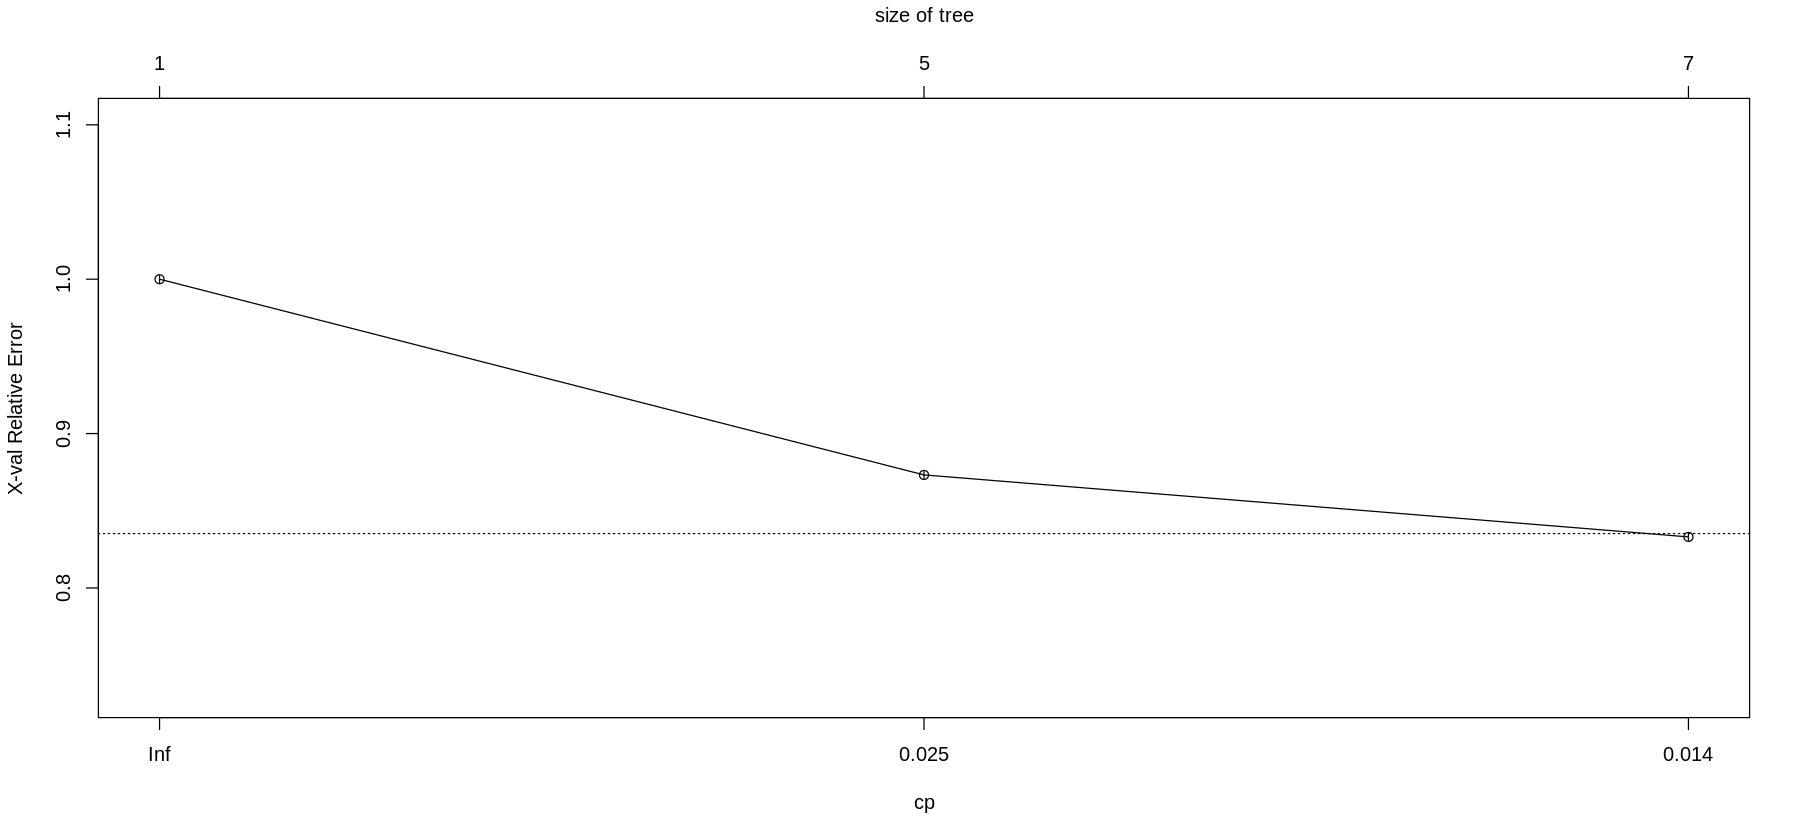

In [ ]:
plotcp(dt_model) # visualize cross-validation results

In [ ]:
summary(dt_model) # detailed summary of splits

Call:
rpart(formula = damage_grade ~ ., data = DS, method = "class")
  n= 260601 

          CP nsplit rel error    xerror        xstd
1 0.03169340      0 1.0000000 1.0000000 0.002250357
2 0.01895106      4 0.8732264 0.8732264 0.002201569
3 0.01000000      6 0.8353243 0.8330811 0.002180003

Variable importance
                        geo_level_1_id                      foundation_type_r 
                                    48                                     20 
                     foundation_type_w                    ground_floor_type_v 
                                     7                                      6 
                     foundation_type_i has_superstructure_cement_mortar_brick 
                                     5                                      4 
                        geo_level_2_id       has_superstructure_rc_engineered 
                                     2                                      2 
                   count_floors_pre_eq                  

In [ ]:
test_set <- read.csv('test_values.csv', stringsAsFactors = F)
test_set <- subset(test_set, select = -c(building_id))
test_set <- recipe(test_set) %>%
  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)
test_set <- test_set[,top_features,drop=F]

In [ ]:
Y_ts <- predict(dt_model,test_set)
damage_grade <- as.vector(apply(Y_ts,1,which.max))
create_submission(damage_grade,'submission_dt_mrmr.csv','test_values.csv')

Warning message in write.csv(df, submission_filename, row.names = FALSE, col.names = FALSE):
“attempt to set 'col.names' ignored”


## Random Forest


One problem with decision trees is the depth of the trees. Indeed, the higher the depth of the tree, the lower the bias, but on the other hand the variance will be high. This means that decision trees tend to overfit the data. Random forest produces a set of independent estimators (tree), which has the effect of reducing the variance. They are independent thanks to two techniques present in this model.

1.**Bagging**: takes without replacement randomly $N$ samples present in the training set for each estimator.

2.**Random features selection**: takes randomly $M$ features from the set of features for each estimator.  

During prediction, each tree makes a prediction. The final prediction is the one that has a majority vote in the case of a classification problem.

The parameters we can tune for Random forest are the **depth** of each tree, the **number of trees**, the **size of the random feature set**. We decided to deal only with the number of trees. To do this, we will build Random forests with a number ranging from **5 to 300**.

In [ ]:
n_tree_seq <- c(5,seq(10,300,10))
idx <- sample(1:nrow(X))
split <- floor(nrow(X)/1.2)#80% for training and 20% for testing
accuracy_vec <- array(0,length(n_tree_seq))

for (i in n_tree_seq){

      X_tr <- X[idx[1:split],]
      Y_tr <- as.factor(Y[idx[1:split]])

      X_ts <- X[idx[(split+1):nrow(X)],]
      Y_ts <- as.factor(Y[idx[(split+1):nrow(X)]])


      model <- randomForest(x= X_tr,
                            y= Y_tr,
                            ntree= i,
                            type= "classification")

      #prediction on the test data
      Y_hat_ts<- predict(model,X_ts)

      accuracy_vec[i] <- F1_Score(Y_ts, Y_hat_ts)
      cat("Accuracy of random forest is: ",Accuracy(Y_ts,Y_hat_ts),"\n")
      cat("F1 score of random forest is: ",F1_Score(Y_ts, Y_hat_ts),"\n")
      flush.console()
    }

plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

Unfortunately, we had to stop the algorithm to find the number of trees because it took too long. We still saved the output as proof that $150$ trees is the right number of trees because after that the `F1_score` does not change (the complete output can be found in our Git).
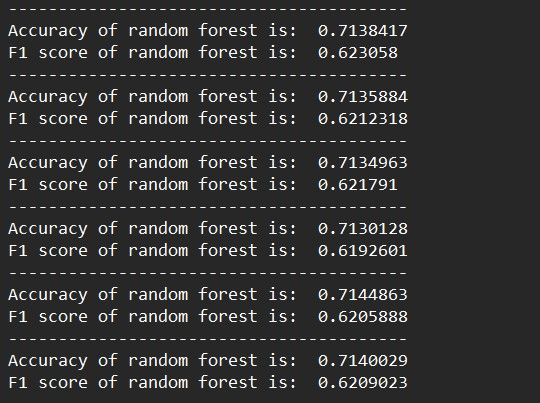

We also decided not to do a cross validation for random forest and to look at the performance of the `out-of-bag` set as it is similar to the cross validation

In [ ]:
n_tree <-150
idx <- sample(1:nrow(X))
split <- floor(nrow(X)/1.2)#80% for training and 20% for testing

X_tr <- X[idx[1:split],]
Y_tr <- as.factor(Y[idx[1:split]])

X_ts <- X[idx[(split+1):nrow(X)],]
Y_ts <- as.factor(Y[idx[(split+1):nrow(X)]])

model <- randomForest(x= X_tr,
                      y= Y_tr,
                      ntree=n_tree,
                      type="classification",
                      Importance=T
                      )

#prediction on the test data
Y_hat_ts<- predict(model,X_ts)
cat("Accuracy of random forest is: ",Accuracy(Y_ts,Y_hat_ts),"\n")
cat("F1 score of random forest is: ",F1_Score(Y_ts, Y_hat_ts),"\n")
ConfusionMatrix(Y_ts,Y_hat_ts)
print("\n Confusion Matrix for OOB set and error rate")
model

Accuracy of random forest is:  0.7160059 
F1 score of random forest is:  0.5366481 


      y_pred
y_true     0     1     2
     0  1878   821    73
     1  2280 21146  6361
     2    69  2731  8075

[1] "\n Confusion Matrix for OOB set and error rate"



Call:
 randomForest(x = X_tr, y = Y_tr, ntree = n_tree, type = "classification",      Importance = T) 
               Type of random forest: classification
                     Number of trees: 150
No. of variables tried at each split: 8

        OOB estimate of  error rate: 28.58%
Confusion matrix:
     0      1     2 class.error
0 9208  11402   287   0.5593626
1 4069 105799 13693   0.1437509
2  366  32240 40103   0.4484452

We can see that the F1-score for Random-forest is $0.534$ and the accuracy is $0.712$. In the other hand, the OOB accuracy is $0.737$.   

###Submission

In [ ]:
n_tree<- 150
model_rf <- randomForest(x= X,
                      y= as.factor(Y),
                      ntree=n_tree,
                      type="classification",
                      Importance=T
                      )

In [ ]:
test_set <- read.csv('test_values.csv', stringsAsFactors = F)
test_set <- subset(test_set, select = -c(building_id))
test_set <- recipe(test_set) %>%
  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)


In [ ]:
damage_grade <- predict(model_rf,test_set)
damage_grade<-strtoi(damage_grade)
create_submission(damage_grade,'submission_rf.csv','test_values.csv')

Warning message in write.csv(df, submission_filename, row.names = FALSE, col.names = FALSE):
“attempt to set 'col.names' ignored”


###Random Forest with mRMR

In [ ]:
n_tree <-150
idx <- sample(1:nrow(X_mrmr))
split <- floor(nrow(X_mrmr)/1.2)#80% for training and 20% for testing

X_tr <- X_mrmr[idx[1:split],]
Y_tr <- as.factor(Y[idx[1:split]])

X_ts <- X_mrmr[idx[(split+1):nrow(X_mrmr)],]
Y_ts <- as.factor(Y[idx[(split+1):nrow(X_mrmr)]])

model <- randomForest(x= X_tr,
                      y= Y_tr,
                      ntree=n_tree,
                      type="classification",
                      Importance=T
                      )

#prediction on the test data
Y_hat_ts<- predict(model,X_ts)
cat("Accuracy of random forest is: ",Accuracy(Y_ts,Y_hat_ts),"\n")
cat("F1 score of random forest is: ",F1_Score(Y_ts, Y_hat_ts),"\n")
ConfusionMatrix(Y_ts,Y_hat_ts)
print("\n Confusion Matrix for OOB set and error rate")
model

Accuracy of random forest is:  0.6892987 
F1 score of random forest is:  0.4885943 


      y_pred
y_true     1     2     3
     1  1585   694    41
     2  2553 21534  7864
     3    30  2313  6820

[1] "\n Confusion Matrix for OOB set and error rate"



Call:
 randomForest(x = X_tr, y = Y_tr, ntree = n_tree, type = "classification",      Importance = T) 
               Type of random forest: classification
                     Number of trees: 150
No. of variables tried at each split: 5

        OOB estimate of  error rate: 31.09%
Confusion matrix:
     1      2     3 class.error
1 7793  13000   163   0.6281256
2 3595 108641 11482   0.1218659
3  255  39031 33207   0.5419282

We can see that the F1-score for Random-forest is $0.498$ and the accuracy is $0.689$. In the other hand, the OOB accuracy is $0.689$.   

###Submission

In [ ]:
n_tree<- 150
model_rf_mrmr <- randomForest(x= X_mrmr,
                      y= as.factor(Y),
                      ntree=n_tree,
                      type="classification",
                      Importance=T
                      )

In [ ]:
test_set <- read.csv('test_values.csv', stringsAsFactors = F)
test_set <- subset(test_set, select = -c(building_id))
test_set <- recipe(test_set) %>%
  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)
test_set <- test_set[,top_features,drop=F]

In [ ]:
damage_grade <- predict(model_rf_mrmr,test_set)
damage_grade<-strtoi(damage_grade)
create_submission(damage_grade,'submission_rf_mrmr.csv','test_values.csv')

Warning message in write.csv(df, submission_filename, row.names = FALSE, col.names = FALSE):
“attempt to set 'col.names' ignored”


###Conclusion

|                       	| F1-score  	| Accuracy  	| Driven data 	|
|-----------------------	|-----------	|-----------	|-------------	|
|     Random Forest     	| 0.5344573 	| 0.7123912 	|     0.7167    |
|  Random Forest + mRMR 	| 0.4885943 	| 0.6892987  	|     0.6902    |

We can see that for Random Forest feature selection with mRMR decrease performances. We can also note that Random Forest does feature selection through `Random features selection`. We decide not to use mRMR with random forest as the final result of this selection.

## Neural network

### Training the neural network without feature selection

We have implemented some techniques that could help us to improve the accuracy and reduce the overfitting of our neural network model:

1. `Early stopping`: This technique is used to prevent overfitting. If the monitored quantity stops to improve after a certain number of epochs, it will stop the training of the model.
2. `Learning rate scheduler `: This technique adjust the learning rate dynamically. It could make our model learn more effectively.By adjusting the learning rate dynamically, the scheduler helps the network to improve the accuracy and reduce the loss.
3. `Dropout`: This technique "turns off " certain neurons with a probability fixed in advance (0.2 in our case). Neurons that are "turned off ", do not contribute to the forward pass and do not participate in backpropagation. This means that at each iteration, the architecture is a slightly different one.


In [ ]:
# split our data into test and training set
dataset_nn <- cbind(X, damage_grade=Y)
split <- initial_split(dataset_nn, 0.8)
train_dataset_nn <- training(split)
test_dataset_nn <- testing(split)

In [ ]:
train_features <- train_dataset_nn %>% select(-damage_grade)
train_labels <- data.frame(train_dataset_nn %>% select(damage_grade))
train_labels = as.numeric(train_labels[,1]) - 1 # damage grade starts at 1 we will make it starst at 0 for a 3-class classification problem witt DNN
train_labels <- to_categorical(train_labels) # One-hot encode label
head(train_labels)

0,1,0
1,0,0
0,1,0
0,1,0
1,0,0
0,1,0


This callback will stop the training when the validation loss quantity has stopped decreasing for a certain number of epoch (the `patience`).

In [ ]:
early_stop_callbak = callback_early_stopping(
  monitor = "val_loss",
  min_delta = 0,
  patience = 10,
  verbose = 1,
  mode="min"
)

This callback monitors the validation loss. If no improvement is seen for a number of epochs (parameter `patience`), the learning rate is reduced (by `factor` 0.1).

In [ ]:
lr_scheduler = callback_reduce_lr_on_plateau(monitor = "val_loss", factor = 0.1, patience = 5)

This callback is used top print some usefull information at the of each epoch

In [ ]:
print_callback = callback_lambda(
  on_epoch_end = function(e,l){
    print(paste("Epoch: ", e+1, "  Val loss: ",l$val_loss," - Val accuracy: ", l$val_accuracy))
    flush.console()
  }
)

The layer normalization is a technique that can be used to improve the performance of a neural network by normalizing the output of each layer, thus preventing the output from becoming too large or too small.

In [ ]:
normalizer <- layer_normalization(axis = -1L)
normalizer %>% adapt(as.matrix(train_features))

For our model, bottleneck design is used. This type of architecture is frequently used for neural networks.
To build our model we were inspired by what we can find on these links:


*   [Bottlenecks design in neural network](https://www.baeldung.com/cs/neural-network-bottleneck)
*   [A multi-class classification example](http://rstudio-pubs-static.s3.amazonaws.com/342554_ac0c9e7d51f049d18fb6e8c0d58565fd.html)



The Adam optimizer is the optimization algorithm that will be used by our neural network model during training phase. Adam optimizer is a type of stochastic gradient descent optimization algorithm that is commonly used for deep learning classification or regression problem. The `learning_rate` parameter specifies the step size that is taken during gradient descent.

In [ ]:
dnn_model <- keras_model_sequential()
dnn_model %>%
  normalizer() %>%
  layer_dense(units = 128, activation = "relu", input_shape = ncol(train_features)) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 64, activation = "relu",) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 32, activation = "relu", ) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 3, activation = "softmax")

dnn_model %>% compile(loss = "categorical_crossentropy", # Categorical cross-entropy is used when labels are one-hot encoded
                  optimizer_adam(learning_rate = 1e-3),
                  metrics = c("accuracy"))

dnn_model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization (Normalization)  (None, 68)                137        Y          
 dense_3 (Dense)               (None, 128)                8832       Y          
 dropout_2 (Dropout)           (None, 128)                0          Y          
 dense_2 (Dense)               (None, 64)                 8256       Y          
 dropout_1 (Dropout)           (None, 64)                 0          Y          
 dense_1 (Dense)               (None, 32)                 2080       Y          
 dropout (Dropout)             (None, 32)                 0          Y          
 dense (Dense)                 (None, 3)                  99         Y          
Total params: 19,404
Trainable params: 19,267
Non-trainable params: 137
________________________________________________________________________________

In [ ]:
history = dnn_model %>% fit(
  as.matrix(train_features),
  train_labels,
  epochs = 200,
  verbose = 1,
  batch = 64,
  validation_split = 0.2, # This will split the dataset given into a validation and training set.
  callbacks = list(early_stop_callbak, print_callback, lr_scheduler)
)

[1] "Epoch:  1   Val loss:  0.768094182014465  - Val accuracy:  0.621930181980133"
[1] "Epoch:  2   Val loss:  0.757890701293945  - Val accuracy:  0.626438975334167"
[1] "Epoch:  3   Val loss:  0.737657845020294  - Val accuracy:  0.640445113182068"
[1] "Epoch:  4   Val loss:  0.726422607898712  - Val accuracy:  0.652412712574005"
[1] "Epoch:  5   Val loss:  0.721521854400635  - Val accuracy:  0.659295856952667"
[1] "Epoch:  6   Val loss:  0.715772330760956  - Val accuracy:  0.656681716442108"
[1] "Epoch:  7   Val loss:  0.715953230857849  - Val accuracy:  0.663157165050507"
[1] "Epoch:  8   Val loss:  0.713834285736084  - Val accuracy:  0.662533581256866"
[1] "Epoch:  9   Val loss:  0.7131108045578  - Val accuracy:  0.662677466869354"
[1] "Epoch:  10   Val loss:  0.710396230220795  - Val accuracy:  0.659991383552551"
[1] "Epoch:  11   Val loss:  0.708311855792999  - Val accuracy:  0.663996517658234"
[1] "Epoch:  12   Val loss:  0.704287171363831  - Val accuracy:  0.667066395282745"
[1]

In [ ]:
history


Final epoch (plot to see history):
        loss: 0.6737
    accuracy: 0.6846
    val_loss: 0.683
val_accuracy: 0.6856
          lr: 0.00000001 

As we can see here, our model doesn't overfit anymore thanks to what we have implemented previously.

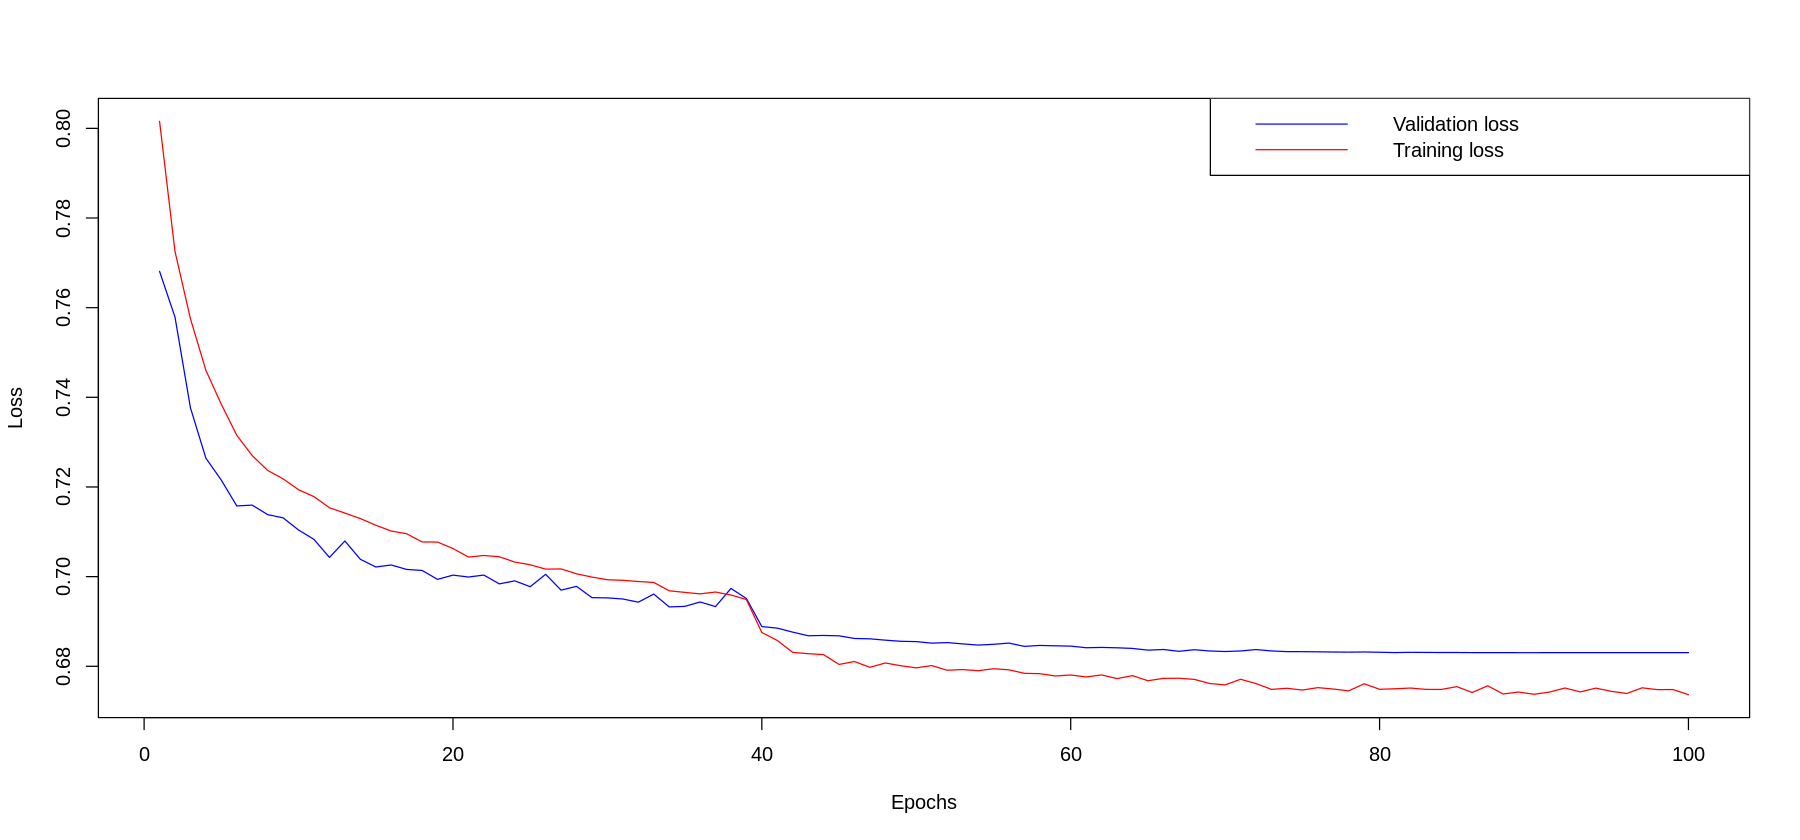

In [ ]:
matplot(x = 1:length(history$metrics$loss),
        y = cbind(history$metrics$val_loss, history$metrics$loss),
        type = "l",
        xlab = "Epochs",
        ylab = "Loss",
        col = c("blue", "red"),
        lty = 1)
legend("topright",
       legend = c("Validation loss", "Training loss"),
       col = c("blue", "red"),
       lty = 1)

Here we can see the evlotion of the accuracy (on validation set) through the time

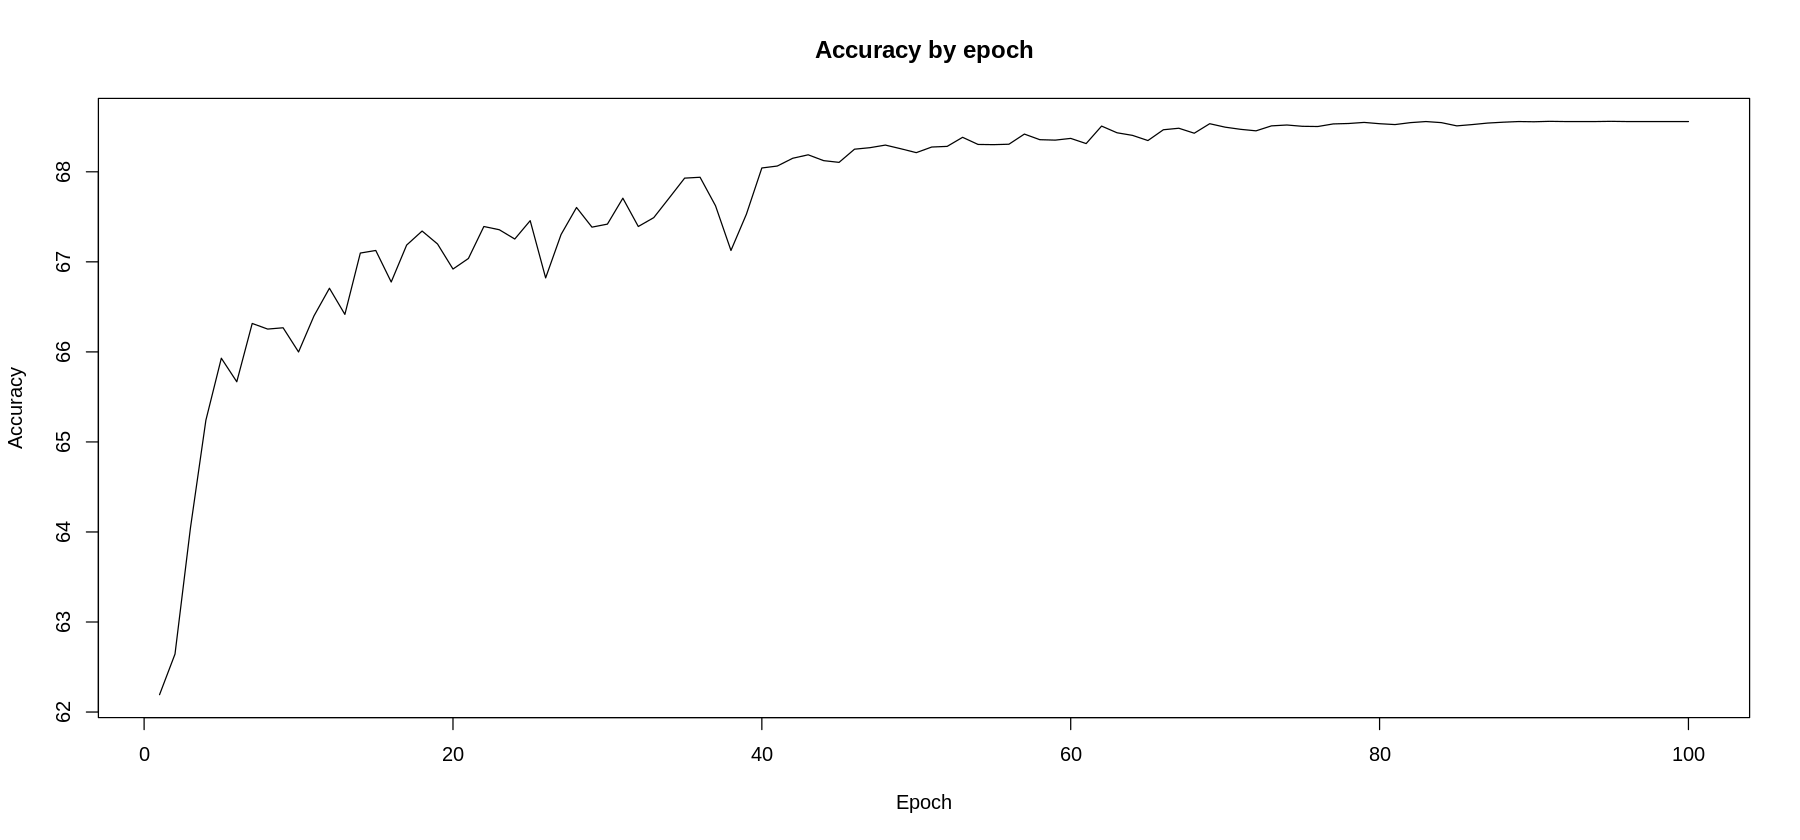

In [ ]:
plot(x=1:length(history$metrics$val_accuracy), y=history$metrics$val_accuracy*100, type = "l", xlab = "Epoch", ylab = "Accuracy", main="Accuracy by epoch")

Evolution of the learning rate

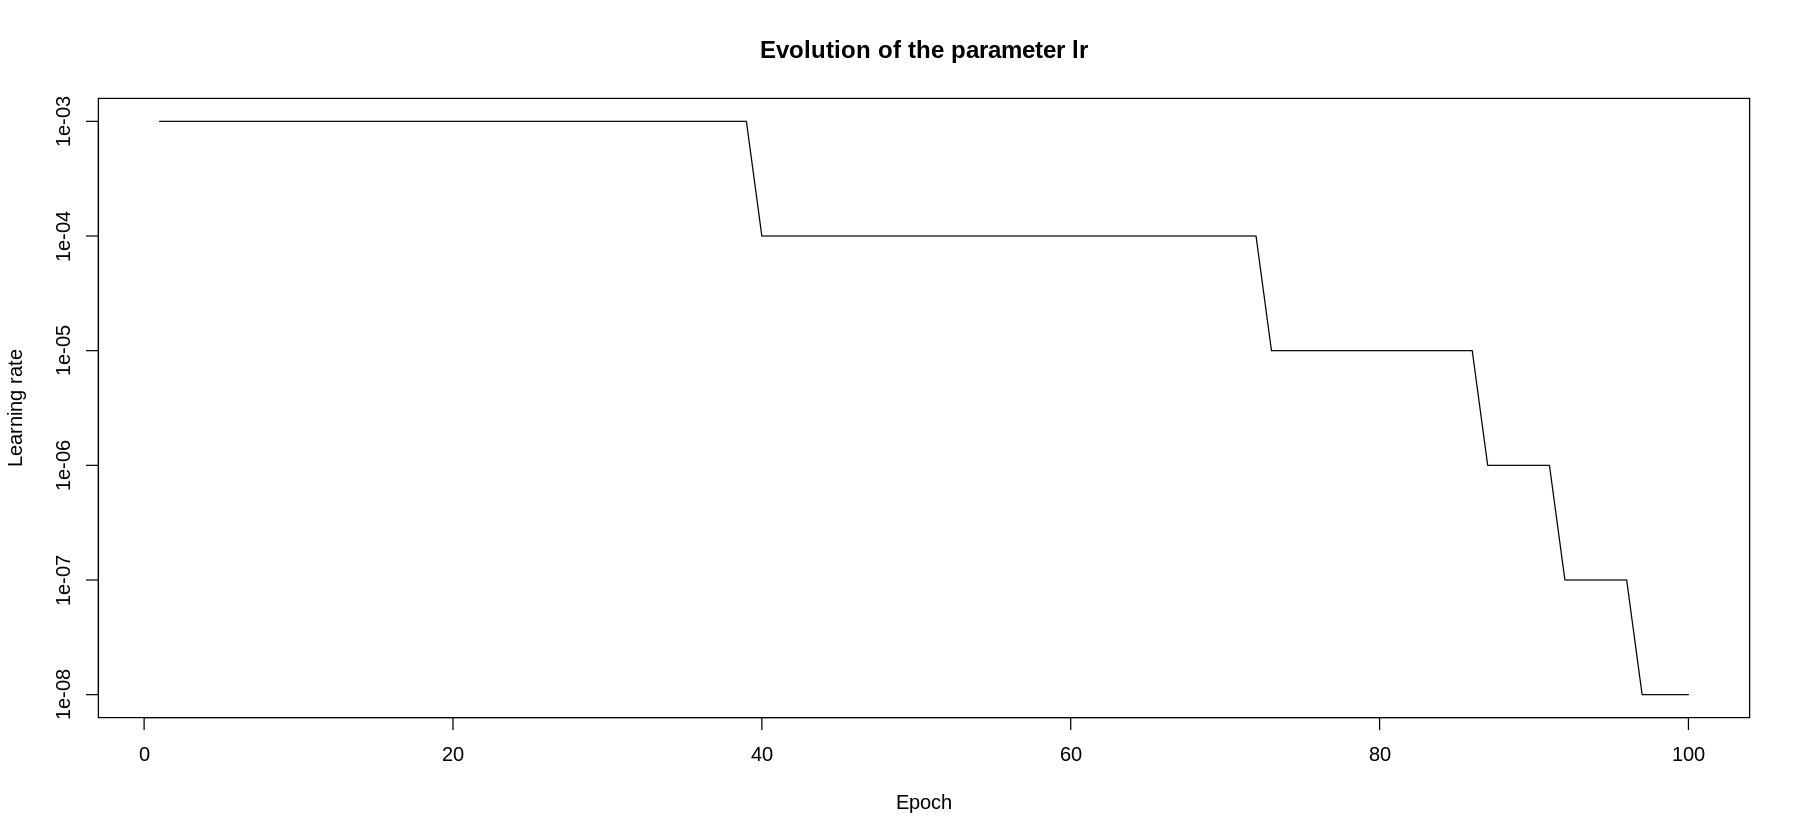

In [ ]:
plot(x=1:length(history$metrics$lr), y=history$metrics$lr,log="y", type = "l", xlab = "Epoch", ylab = "Learning rate", main="Evolution of the parameter lr")

### Test the neural network without feature selection

In [ ]:
Y_ts <- test_dataset_nn[, "damage_grade"]

In [ ]:
X_ts <- test_dataset_nn[, setdiff(colnames(test_dataset_nn),"damage_grade")]

In [ ]:
Y_pred <- predict(dnn_model,as.matrix(X_ts))
Y_hat <- as.vector(apply(Y_pred,1,which.max))
cm <- ConfusionMatrix(Y_hat,Y_ts)
cm

      y_pred
y_true     1     2     3
     1  1843   938    77
     2  3192 24965  8566
     3    66  3706  8768

In [ ]:
cat("Accuracy:", Accuracy(Y_hat,Y_ts),"\n")
cat("F1-score:", F1_Score(Y_hat,Y_ts),"\n")

Accuracy: 0.6825656 
F1-score: 0.4631235 


### Training the neural network with feature selection (mRMR)

In [ ]:
top_features <- c(selected[1:35]) # Subset of top features

# split our data into test and training set
dataset_nn <- cbind(X, damage_grade=Y)
split <- initial_split(dataset_nn, 0.8)
train_dataset_nn <- training(split)
test_dataset_nn <- testing(split)

train_features <- train_dataset_nn %>% select(-damage_grade)
train_features <- train_features[,top_features,drop=F] # select only top features columns
train_labels <- data.frame(train_dataset_nn %>% select(damage_grade))
train_labels = as.numeric(train_labels[,1]) - 1 # damage grade starts at 1 we will make it starst at 0 for a 3-class classification problem witt DNN
train_labels <- to_categorical(train_labels) # One-hot encode label

In [ ]:
early_stop_callbak = callback_early_stopping(
  monitor = "val_loss",
  min_delta = 0,
  patience = 10,
  verbose = 1,
  mode="min"
)

In [ ]:
lr_scheduler = callback_reduce_lr_on_plateau(monitor = "val_loss", factor = 0.1, patience = 5)

In [ ]:
print_callback = callback_lambda(
  on_epoch_end = function(e,l){
    print(paste("Epoch: ", e+1, "  Val loss: ",l$val_loss," - Val accuracy: ", l$val_accuracy))
    flush.console()
  }
)

In [ ]:
normalizer <- layer_normalization(axis = -1L)
normalizer %>% adapt(as.matrix(train_features))

In [ ]:
dnn_model <- keras_model_sequential()
dnn_model %>%
  normalizer() %>%
  layer_dense(units = 128, activation = "relu", input_shape = ncol(train_features)) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 64, activation = "relu",) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 32, activation = "relu", ) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 3, activation = "softmax")

dnn_model %>% compile(loss = "categorical_crossentropy", # Categorical cross-entropy is used when labels are one-hot encoded
                  optimizer_adam(learning_rate = 1e-3),
                  metrics = c("accuracy"))

dnn_model

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization_2 (Normalizatio  (None, 35)                71         Y          
 n)                                                                             
 dense_11 (Dense)              (None, 128)                4608       Y          
 dropout_8 (Dropout)           (None, 128)                0          Y          
 dense_10 (Dense)              (None, 64)                 8256       Y          
 dropout_7 (Dropout)           (None, 64)                 0          Y          
 dense_9 (Dense)               (None, 32)                 2080       Y          
 dropout_6 (Dropout)           (None, 32)                 0          Y          
 dense_8 (Dense)               (None, 3)                  99         Y          
Total params: 15,114
Trainable params: 15,043
Non-trainable params: 71
________________

In [ ]:
history = dnn_model %>% fit(
  as.matrix(train_features),
  train_labels,
  epochs = 200,
  verbose = 1,
  batch = 64,
  validation_split = 0.2, # This will split the dataset given into a validation and training set.
  callbacks = list(early_stop_callbak, print_callback, lr_scheduler)
)

[1] "Epoch:  1   Val loss:  0.768095552921295  - Val accuracy:  0.626343071460724"
[1] "Epoch:  2   Val loss:  0.749514758586884  - Val accuracy:  0.632194936275482"
[1] "Epoch:  3   Val loss:  0.73217362165451  - Val accuracy:  0.644905984401703"
[1] "Epoch:  4   Val loss:  0.728536307811737  - Val accuracy:  0.642195880413055"
[1] "Epoch:  5   Val loss:  0.720544278621674  - Val accuracy:  0.65723329782486"
[1] "Epoch:  6   Val loss:  0.722681224346161  - Val accuracy:  0.645337700843811"
[1] "Epoch:  7   Val loss:  0.717765033245087  - Val accuracy:  0.656154096126556"
[1] "Epoch:  8   Val loss:  0.717093408107758  - Val accuracy:  0.661358416080475"
[1] "Epoch:  9   Val loss:  0.715052783489227  - Val accuracy:  0.656393885612488"
[1] "Epoch:  10   Val loss:  0.715836584568024  - Val accuracy:  0.658384501934052"
[1] "Epoch:  11   Val loss:  0.712020933628082  - Val accuracy:  0.664835929870605"
[1] "Epoch:  12   Val loss:  0.712074637413025  - Val accuracy:  0.660279154777527"
[1]

In [ ]:
history


Final epoch (plot to see history):
        loss: 0.6931
    accuracy: 0.6746
    val_loss: 0.6929
val_accuracy: 0.6744
          lr: 0.00000001 

As we can see here again, our model doesn't overfit.

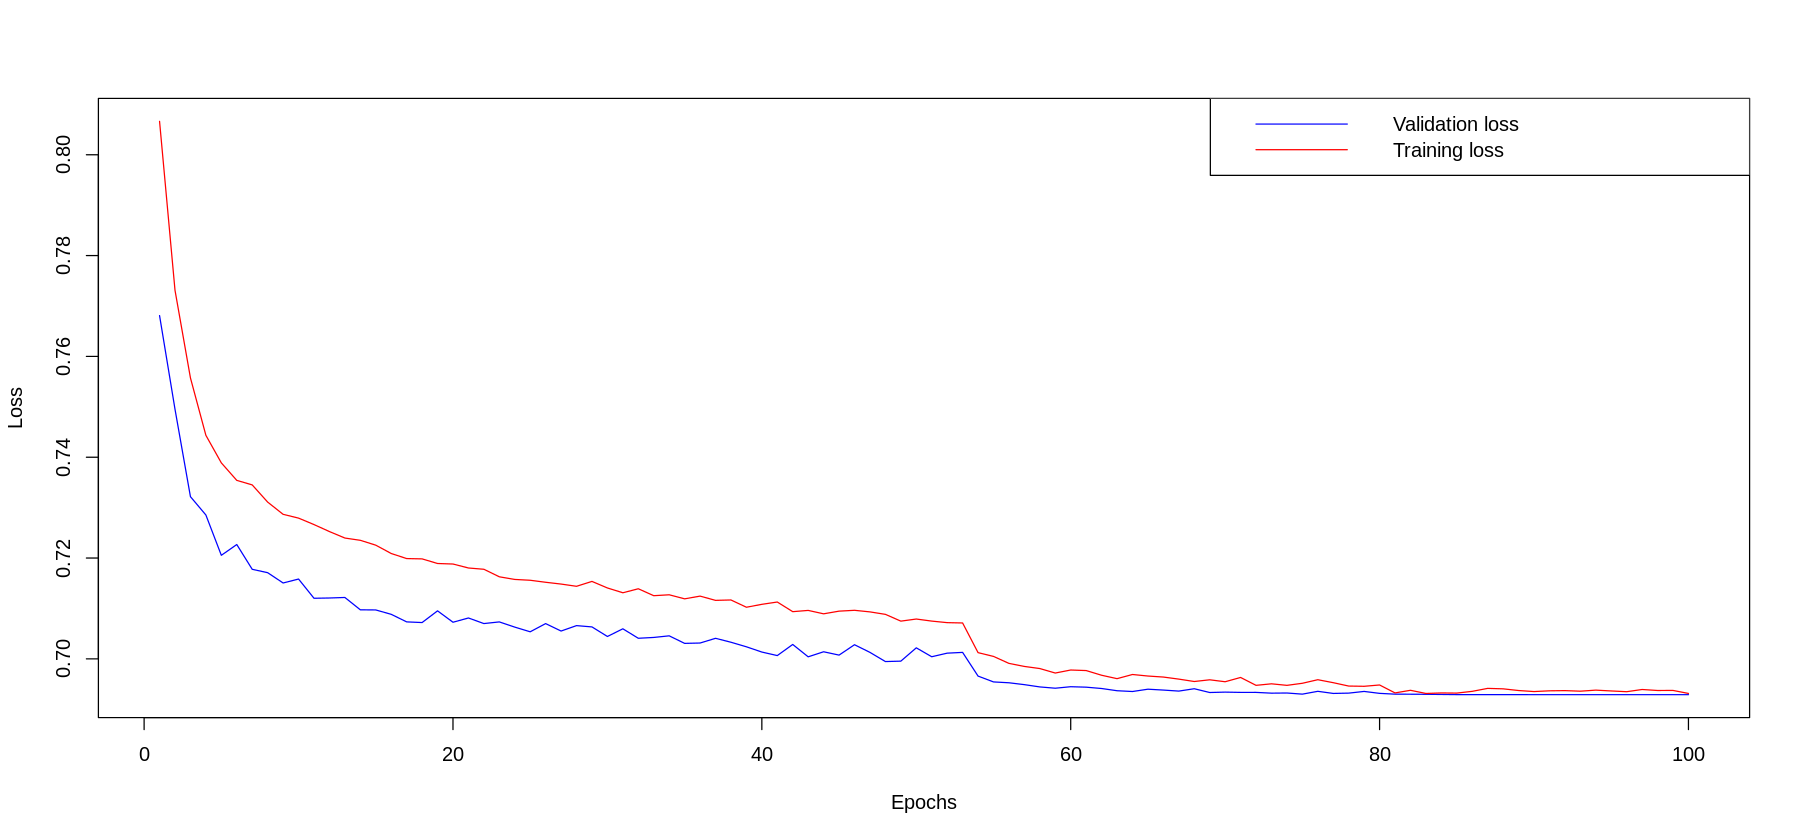

In [ ]:
matplot(x = 1:length(history$metrics$loss),
        y = cbind(history$metrics$val_loss, history$metrics$loss),
        type = "l",
        xlab = "Epochs",
        ylab = "Loss",
        col = c("blue", "red"),
        lty = 1)
legend("topright",
       legend = c("Validation loss", "Training loss"),
       col = c("blue", "red"),
       lty = 1)

Here we can see the evlotion of the accuracy (on validation set) through the time

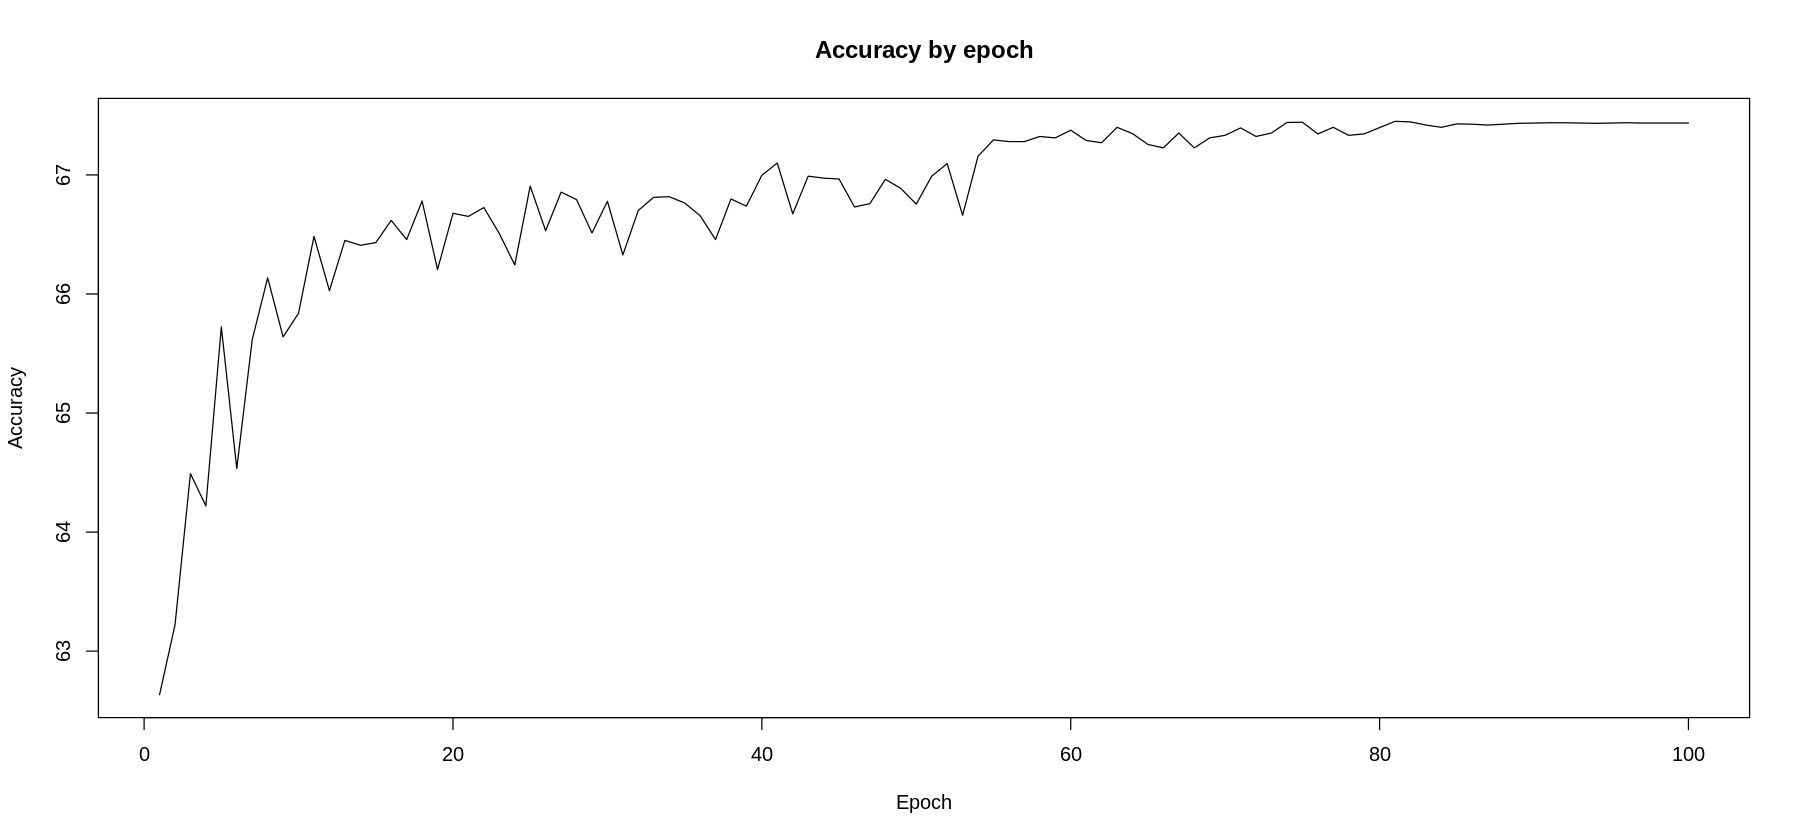

In [ ]:
plot(x=1:length(history$metrics$val_accuracy), y=history$metrics$val_accuracy*100, type = "l", xlab = "Epoch", ylab = "Accuracy", main="Accuracy by epoch")

Evolution of the parameter learning rate.

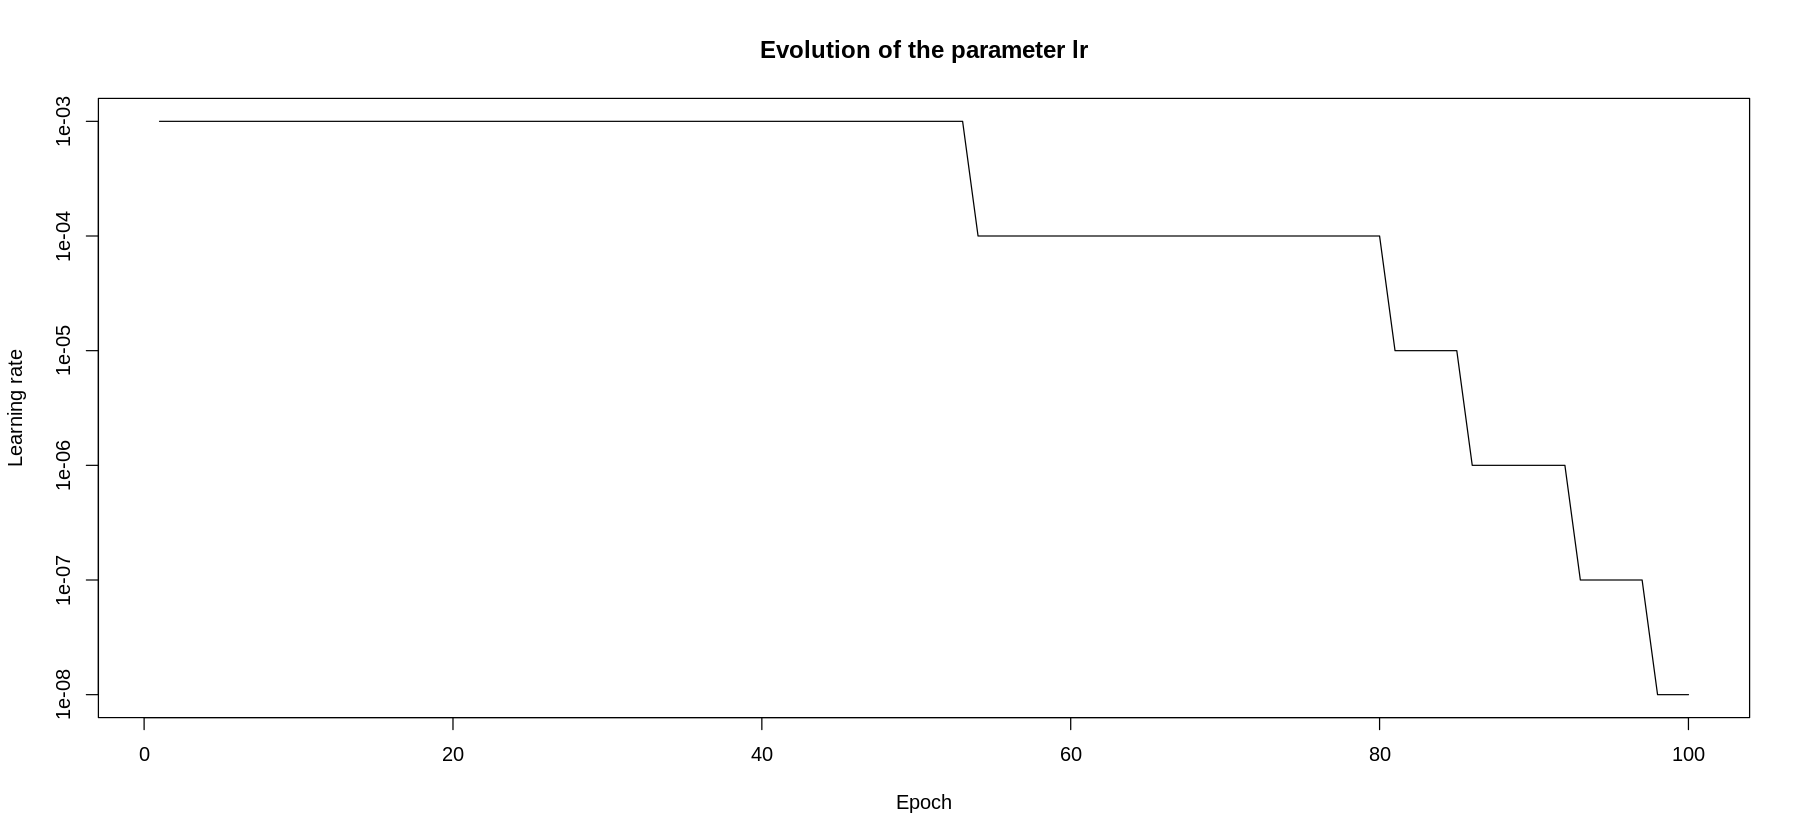

In [ ]:
plot(x=1:length(history$metrics$lr), y=history$metrics$lr,log="y", type = "l", xlab = "Epoch", ylab = "Learning rate", main="Evolution of the parameter lr")

### Testing the neural network with feature selection (mRMR)

In [ ]:
Y_ts <- test_dataset_nn[, "damage_grade"]
X_ts <- test_dataset_nn[, setdiff(colnames(test_dataset_nn),"damage_grade")]
X_ts <- X_ts[,top_features,drop=F]

Y_pred <- predict(dnn_model,as.matrix(X_ts))
Y_hat <- as.vector(apply(Y_pred,1,which.max))
cm <- ConfusionMatrix(Y_hat,Y_ts)
cm

cat("Accuracy:", Accuracy(Y_hat,Y_ts),"\n")
cat("F1-score:", F1_Score(Y_hat,Y_ts),"\n")

      y_pred
y_true     1     2     3
     1  1720   957    71
     2  3266 25170  9114
     3    73  3600  8150

Accuracy: 0.6722818 
F1-score: 0.4406302 


### Submission

As we have less accuracy and f1-score with mRMR than without we will train our model without feature selection. We also upload our predictions with feature selection on our side. You will find our results in the conclusion.

In [ ]:
dataset_nn <- cbind(X, damage_grade=Y)
train_features <- dataset_nn %>% select(-damage_grade)
train_labels <- data.frame(dataset_nn %>% select(damage_grade))
train_labels = as.numeric(train_labels[,1]) - 1 # damage grade starts at 1 we will make it starts at 0 for a 3-class classification problem with DNN
train_labels <- to_categorical(train_labels) # One-hot encode label

In [ ]:
normalizer <- layer_normalization(axis = -1L)
normalizer %>% adapt(as.matrix(train_features))

In [ ]:
dnn_model <- keras_model_sequential()
dnn_model %>%
  normalizer() %>%
  layer_dense(units = 128, activation = "relu", input_shape = ncol(train_features)) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 64, activation = "relu",) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 32, activation = "relu", ) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 3, activation = "softmax")

dnn_model %>% compile(loss = "categorical_crossentropy", # Categorical cross-entropy is used when labels are one-hot encoded
                  optimizer_adam(learning_rate = 1e-3),
                  metrics = c("accuracy"))

dnn_model

Model: "sequential_9"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization_6 (Normalizatio  (None, 35)                71         Y          
 n)                                                                             
 dense_39 (Dense)              (None, 128)                4608       Y          
 dropout_29 (Dropout)          (None, 128)                0          Y          
 dense_38 (Dense)              (None, 64)                 8256       Y          
 dropout_28 (Dropout)          (None, 64)                 0          Y          
 dense_37 (Dense)              (None, 32)                 2080       Y          
 dropout_27 (Dropout)          (None, 32)                 0          Y          
 dense_36 (Dense)              (None, 3)                  99         Y          
Total params: 15,114
Trainable params: 15,043
Non-trainable params: 71
________________

In [ ]:
history = dnn_model %>% fit(
  as.matrix(train_features),
  train_labels,
  epochs = 200,
  verbose = 1,
  batch = 64,
  validation_split = 0.2, # This will split the dataset given into a validation and training set.
  callbacks = list(early_stop_callbak, print_callback, lr_scheduler)
)

[1] "Epoch:  1   Val loss:  0.763613402843475  - Val accuracy:  0.621688008308411"
[1] "Epoch:  2   Val loss:  0.747383773326874  - Val accuracy:  0.635636329650879"
[1] "Epoch:  3   Val loss:  0.732174515724182  - Val accuracy:  0.645958423614502"
[1] "Epoch:  4   Val loss:  0.722411334514618  - Val accuracy:  0.653153240680695"
[1] "Epoch:  5   Val loss:  0.714227318763733  - Val accuracy:  0.658179998397827"
[1] "Epoch:  6   Val loss:  0.709728538990021  - Val accuracy:  0.662496864795685"
[1] "Epoch:  7   Val loss:  0.707914471626282  - Val accuracy:  0.662516057491302"
[1] "Epoch:  8   Val loss:  0.705935716629028  - Val accuracy:  0.663513720035553"
[1] "Epoch:  9   Val loss:  0.702773928642273  - Val accuracy:  0.666641056537628"
[1] "Epoch:  10   Val loss:  0.700619161128998  - Val accuracy:  0.665931224822998"
[1] "Epoch:  11   Val loss:  0.700163424015045  - Val accuracy:  0.668770730495453"
[1] "Epoch:  12   Val loss:  0.699132263660431  - Val accuracy:  0.670267283916473"
[

In [ ]:
test_set <- read.csv('test_values.csv', stringsAsFactors = F)
test_set <- subset(test_set, select = -c(building_id))

test_set <- recipe(test_set) %>%
  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)

In [ ]:
Y_ts <- predict(dnn_model,as.matrix(test_set))
damage_grade <- as.vector(apply(Y_ts,1,which.max))
create_submission(damage_grade,'submission_dnn.csv','test_values.csv')

Warning message in write.csv(df, submission_filename, row.names = FALSE, col.names = FALSE):
“attempt to set 'col.names' ignored”


###Conclusion

We obtain better results without feature selection for neural network

# Model not seen during the course
We have already seen decision trees and Random forest. In the continuity of what we have seen, another technique is very popular in machine learning, it is the tree **boosting**.  Unlike Random Forest, which does **bagging** (building trees in parallel), **boosting** consists of building trees sequentially so that the previous tree helps to improve the next tree(each predictor corrects the error of its predecessor).
With this in mind, we decided to use ***XGBoost*** for tree boosting.

##XGBoost (eXtreme Gradient Boosting)

references :


*    https://xgboost.readthedocs.io/en/stable/tutorials/model.html
*   https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters



XGBoost proposes an implementation of Gradient Boosted decision trees. The general way XGBoost works is this:

*   A first prediction is made, from this prediction, the residuals are calculated and used to build the next tree with the residuals using similarity score for residuals.

The similarity scores is compute like that:


\begin{equation*}
 \frac{\sum_{i=1}^n Residual_i}{\sum_{i=1}^n (previous probability_i)*(1-previous probability_i)+Λ}  
\end{equation*} Where $λ$ is the regularisation parameter.





As with most supervised learning models, we need to define an objective function and optimise it. The general structure of the objective function is as follows:
\begin{equation*}
Obj(θ) = L(θ) + Ω(θ)
\end{equation*} Where L(θ) is the training loss, in case of classification we will use [cross entropy loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)  and Ω(θ) is the regularization term.

regularization term controls the model complexity to avoid overfitting. Here is the regularization of the tree $f$ used by XGBoost:
\begin{equation*}
 ω(f)= γT + \frac{1}{2}Λ\sum_{j=1}^T w_j^2
\end{equation*} Where $T$ is the number of leaves and $w$ is the vector of scores on leaves.

###Implementation
Important : XGboost requires the classes to start at `0` and not `1` as in our classification problem. We need to transform our dataset so that the `damage_grade` column starts at `0`

In [ ]:
Y= as.integer(Y)-1
damage_grade = dataset$damage_grade

In this section, we will tune and initialize XGBoost parameters :


*  `booster`: Type of boost to use. In our case, ***gradient boosting tree***
*  `eta`: Represent the ***learning rate***
*  `max_depth`: Maximum depth of a tree
*  `colsample_bytree`: The subsample ratio of columns when constructing each tree

*  `min_child_weight`: Minimum sum of instance weight needed in a child
*  `subsample`: Ratio of training data prior to growing trees

*  `objective`: The objective function. we are using `softprob` for multiclass classification.
*  `eval_metric`: A evaluation metrics for validation set
*  `num_class`: Number of classes in the initial classification problem

The parameters that we will optimize are :
`max_depth, min_child_weight,subsample,colsample_bytree`

We are going to use the `MLR`(Machine Learning in R) library which contains a lot of functions to do machine learning in R and also the one to do parameter tuning.

*Ref for tuning XGBoost parameter:*
https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/

In [ ]:
train_matrix<-xgb.DMatrix(data = as.matrix(X), label = Y)

In [ ]:
#create learner
lrn <- makeLearner("classif.xgboost",predict.type = "response") #create a XGBoost learner

lrn$par.vals <- list( objective="multi:softprob", eval_metric="mlogloss", nrounds=100L, eta=0.2) #initialize parameters

#set parameter space
params <- makeParamSet( makeDiscreteParam("booster",values = c("gbtree")), makeIntegerParam("max_depth",lower = 3L,upper = 15L),
makeNumericParam("min_child_weight",lower = 1L,upper = 15L), makeNumericParam("subsample",lower = 0.5,upper = 1),
                 makeNumericParam("colsample_bytree",lower = 0.3,upper = 1)) #create set of parameter to test for tunning

#set resampling strategy
rdesc <- makeResampleDesc("CV",stratify = T,iters=5L) # initialize a resampling strategy. We use 5-cross-validation
ctrl <- makeTuneControlGrid() #allow to use grid search for parameters tunning

In [ ]:
parallelStartSocket(cpus = detectCores())#detect number of core in cpu
df<-data.frame(X,as.factor(Y))
traintask <- makeClassifTask(data =df,target = "as.factor.Y.") #create a classification task

Starting parallelization in mode=socket with cpus=2.



In [ ]:
mytune <- tuneParams(learner = lrn, task = traintask,
resampling = rdesc, measures = acc, par.set = params, control = ctrl, show.info = T)

[Tune] Started tuning learner classif.xgboost for parameter set:

                     Type len Def   Constr Req Tunable Trafo
booster          discrete   -   -   gbtree   -    TRUE     -
max_depth         integer   -   -  3 to 15   -    TRUE     -
min_child_weight  numeric   -   -  1 to 15   -    TRUE     -
subsample         numeric   -   - 0.3 to 1   -    TRUE     -
colsample_bytree  numeric   -   - 0.3 to 1   -    TRUE     -

With control class: TuneControlGrid

Imputation value: -0

Exporting objects to slaves for mode socket: .mlr.slave.options

Mapping in parallel: mode = socket; level = mlr.tuneParams; cpus = 2; elements = 10000.



Unfortunately, this manipulation takes a lot of time. We did it on our personnal computer but forget to save the output...

We now have the optimal parameters, we will train the model with these parameters by doing cross validation (Note that when tuning the parameters we were already doing cross validation, but we wanted to do it again to calculate the F1_score and use the same procedure as seen in tp).

In [ ]:
nbclasses <- length(levels(as.factor(damage_grade)))#Number of classes in the initial problem (3)
#initialization of parameters
xgb_params <- list(
                   booster="gbtree",
                   eta = 0.2,
                   max_depth = 13,
                   min_child_weight=8.97,
                   subsample=0.939,
                   colsample_bytree=0.923,
                   "objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = nbclasses)

###XGBoost without feature selection

We are doing 10-fold cross-validation to asses the quality of our estimateur. The library XGBoost provide a method to do cross-validation. We decide to use the implementation used during the tp.  

In [ ]:
CV_folds <- 10
size_CV <-floor(N/CV_folds)
f1_scores<-numeric(CV_folds)
accuracy<-numeric(CV_folds)


for (i in 1:CV_folds) {

      idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  # idx_ts represents the indices of the test set the i-th fold
      X_ts <- as.matrix(X[idx_ts,]) #XGBoost require an Matrix as input
      Y_ts <- Y[idx_ts] #output
      test_matrix<-xgb.DMatrix(data = X_ts, label = Y_ts) # Internal data structure provides by XGBoost. Optimized for both memory efficiency and training speed.


      idx_tr<-setdiff(1:N,idx_ts)  #idx_tr represents indices of the training set for the i-th fold
      X_tr <- as.matrix(X[idx_tr,]) #XGBoost require an Matrix as input
      Y_tr <- Y[idx_tr] #output
      train_matrix<-xgb.DMatrix(data = X_tr, label = Y_tr)


      xgb_model<-xgb.train(
                params=xgb_params,
                data=train_matrix,
                nrounds=100, #nb of tree in the case of boosting tree
                verbose=0 #don't show info on the console
                )

      # Model prediction
      Y_hat_ts <- predict(xgb_model,test_matrix,reshape=T)
      Y_hat_ts <- as.data.frame(Y_hat_ts)
      colnames(Y_hat_ts) =levels(as.factor(damage_grade))
      Y_hat_ts$prediction = apply(Y_hat_ts,1,function(x) colnames(Y_hat_ts)[which.max(x)])#The objectif function(Softproba) return probabilities
                                                                                          #we take the one with the biggest probability.
      Y_hat_ts$label = levels(as.factor(damage_grade))[Y_ts+1]#transform the classes [0,1,2] to [1,2,3] for the true label

      f1_scores[i] <- F1_Score(Y_hat_ts$label, Y_hat_ts$prediction)
      accuracy[i] <- Accuracy(Y_hat_ts$label, Y_hat_ts$prediction)
      print(paste("F1-score of the model on validation set at FOLD",i,"is", f1_scores[i],"\n"))
      print(paste("Accuracy of the model on validation set at FOLD",i,"is", accuracy[i],"\n"))
      print("-----------------")
      flush.console()
}
cat("F1-score of the model on validation set: ", mean(f1_scores),"\n")
cat("Accuracy of the model on validation set: ", mean(accuracy),"\n")

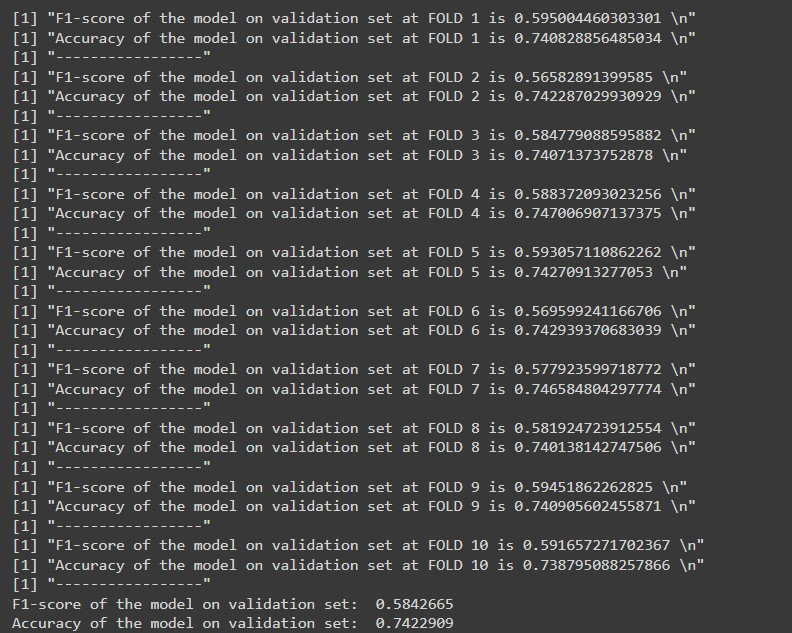

###Submission

In [ ]:
X_tr <- as.matrix(X)
Y_tr <- Y
train_matrix<-xgb.DMatrix(data = X_tr, label = Y_tr)

xgb_model_submission<-xgb.train(
                params=xgb_params,
                data=train_matrix,
                nrounds=100,
                verbose=0
                )

In [ ]:
test_set <- read.csv('test_values.csv', stringsAsFactors = F)
test_set <- subset(test_set, select = -c(building_id))
test_set <- recipe(test_set) %>%
  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)

In [ ]:
X_ts <- as.matrix(test_set)
X_ts<-xgb.DMatrix(data = X_ts)
damage_grade_pred <- predict(xgb_model_submission,X_ts,reshape=T)
damage_grade_pred <- as.data.frame(damage_grade_pred)

colnames(damage_grade_pred) = levels(as.factor(damage_grade))

damage_grade_pred$prediction = apply(damage_grade_pred,1,function(x) colnames(damage_grade_pred)[which.max(x)])
damage_grade_pred$prediction<-strtoi(damage_grade_pred$prediction)
create_submission(damage_grade_pred$prediction,'submission_xgboost.csv','test_values.csv')

Warning message in write.csv(df, submission_filename, row.names = FALSE, col.names = FALSE):
“attempt to set 'col.names' ignored”


###XGBoost with mRMR

In [ ]:
CV_folds <- 10
size_CV <-floor(N_mrmr/CV_folds)
f1_scores<-numeric(CV_folds)
accuracy<-numeric(CV_folds)

for (i in 1:CV_folds) {

      idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  # idx_ts represents the indices of the test set the i-th fold
      X_ts <- as.matrix(X_mrmr[idx_ts,]) #XGBoost require an Matrix as input
      Y_ts <- Y[idx_ts] #output
      test_matrix<-xgb.DMatrix(data = X_ts, label = Y_ts) # Internal data structure provides by XGBoost. Optimized for both memory efficiency and training speed.


      idx_tr<-setdiff(1:N_mrmr,idx_ts)  #idx_tr represents indices of the training sefor the i-th fold
      X_tr <- as.matrix(X_mrmr[idx_tr,]) #XGBoost require an Matrix as input
      Y_tr <- Y[idx_tr] #output
      train_matrix<-xgb.DMatrix(data = X_tr, label = Y_tr)


      xgb_model<-xgb.train(
                params=xgb_params,
                data=train_matrix,
                nrounds=100, #nb of tree in the case of boosting tree
                verbose=0 #don't show info on the console
                )

      # Model prediction
      Y_hat_ts <- predict(xgb_model,test_matrix,reshape=T)
      Y_hat_ts <- as.data.frame(Y_hat_ts)
      colnames(Y_hat_ts) =levels(as.factor(damage_grade))
      Y_hat_ts$prediction = apply(Y_hat_ts,1,function(x) colnames(Y_hat_ts)[which.max(x)])#The objectif function(Softproba) return probabilities
                                                                                          #we take the one with the biggest probability.
      Y_hat_ts$label = levels(as.factor(damage_grade))[Y_ts+1]#transform the classes [0,1,2] to [1,2,3] for the true label


      f1_scores[i] <- F1_Score(Y_hat_ts$label, Y_hat_ts$prediction)
      accuracy[i] <- Accuracy(Y_hat_ts$label, Y_hat_ts$prediction)
      print(paste("F1-score of the model on validation set at FOLD",i,"is", f1_scores[i],"\n"))
      print(paste("Accuracy of the model on validation set at FOLD",i,"is", accuracy[i],"\n"))
      print("-----------------")
      flush.console()
}
cat("F1-score of the model on validation set: ", mean(f1_scores),"\n")


[1] "F1-score of the model on validation set at FOLD 1 is 0.570363466915191 \n"
[1] "Accuracy of the model on validation set at FOLD 1 is 0.730122793553338 \n"
[1] "-----------------"
[1] "F1-score of the model on validation set at FOLD 2 is 0.570048309178744 \n"
[1] "Accuracy of the model on validation set at FOLD 2 is 0.728779739063699 \n"
[1] "-----------------"
[1] "F1-score of the model on validation set at FOLD 3 is 0.564408725602755 \n"
[1] "Accuracy of the model on validation set at FOLD 3 is 0.731427475057559 \n"
[1] "-----------------"
[1] "F1-score of the model on validation set at FOLD 4 is 0.565698478561549 \n"
[1] "Accuracy of the model on validation set at FOLD 4 is 0.730237912509593 \n"
[1] "-----------------"
[1] "F1-score of the model on validation set at FOLD 5 is 0.55719557195572 \n"
[1] "Accuracy of the model on validation set at FOLD 5 is 0.72432847275518 \n"
[1] "-----------------"
[1] "F1-score of the model on validation set at FOLD 6 is 0.554587155963303 \n"
[1

In [ ]:
cat("Accuracy of the model on validation set: ", mean(accuracy),"\n")

Accuracy of the model on validation set:  0.7275134 


###Submission

In [ ]:
X_tr <- as.matrix(X_mrmr)
Y_tr <- Y
train_matrix<-xgb.DMatrix(data = X_tr, label = Y_tr)

xgb_model_submission<-xgb.train(
                params=xgb_params,
                data=train_matrix,
                nrounds=100,
                verbose=0
                )

In [ ]:
test_set <- read.csv('test_values.csv', stringsAsFactors = F)
test_set <- subset(test_set, select = -c(building_id))
test_set <- recipe(test_set) %>%
  step_dummy(legal_ownership_status, one_hot = TRUE) %>%

  step_dummy(land_surface_condition, one_hot = TRUE) %>%

  step_dummy(plan_configuration, one_hot = TRUE) %>%

  step_dummy(position, one_hot = TRUE) %>%

  step_dummy(other_floor_type, one_hot = TRUE) %>%

  step_dummy(ground_floor_type, one_hot = TRUE) %>%

  step_dummy(roof_type, one_hot = TRUE) %>%

  step_dummy(foundation_type, one_hot = TRUE) %>%

  prep() %>%

  bake(new_data = NULL)
  test_set <- test_set[,top_features,drop=F]

In [ ]:
X_ts <- as.matrix(test_set)
X_ts<-xgb.DMatrix(data = X_ts)
damage_grade_pred <- predict(xgb_model_submission,X_ts,reshape=T)
damage_grade_pred <- as.data.frame(damage_grade_pred)

colnames(damage_grade_pred) = levels(as.factor(damage_grade))

damage_grade_pred$prediction = apply(damage_grade_pred,1,function(x) colnames(damage_grade_pred)[which.max(x)])
damage_grade_pred$prediction<-strtoi(damage_grade_pred$prediction)
create_submission(damage_grade_pred$prediction,'submission_xgboost_mrmr.csv','test_values.csv')

Warning message in write.csv(df, submission_filename, row.names = FALSE, col.names = FALSE):
“attempt to set 'col.names' ignored”


###XGBoost features importance

XGBoost allows you to see the importance of each feature when building the model. it provides a score that indicates how useful each feature was in the construction of the boosted decision trees.

Here, we are training the model with the complete dataset.

In [ ]:
X_tr <- as.matrix(X)
Y_tr <- Y
train_matrix<-xgb.DMatrix(data = X_tr, label = Y_tr)

xgb_model_submission<-xgb.train(
                params=xgb_params,
                data=train_matrix,
                nrounds=100,
                verbose=0
                )


We can see that the 3 levels of geographical region are extremely used for the construction of the model. We did not have the same importance of features with mRMR. Indeed `geo_level_3_id` was not even in the top 35.

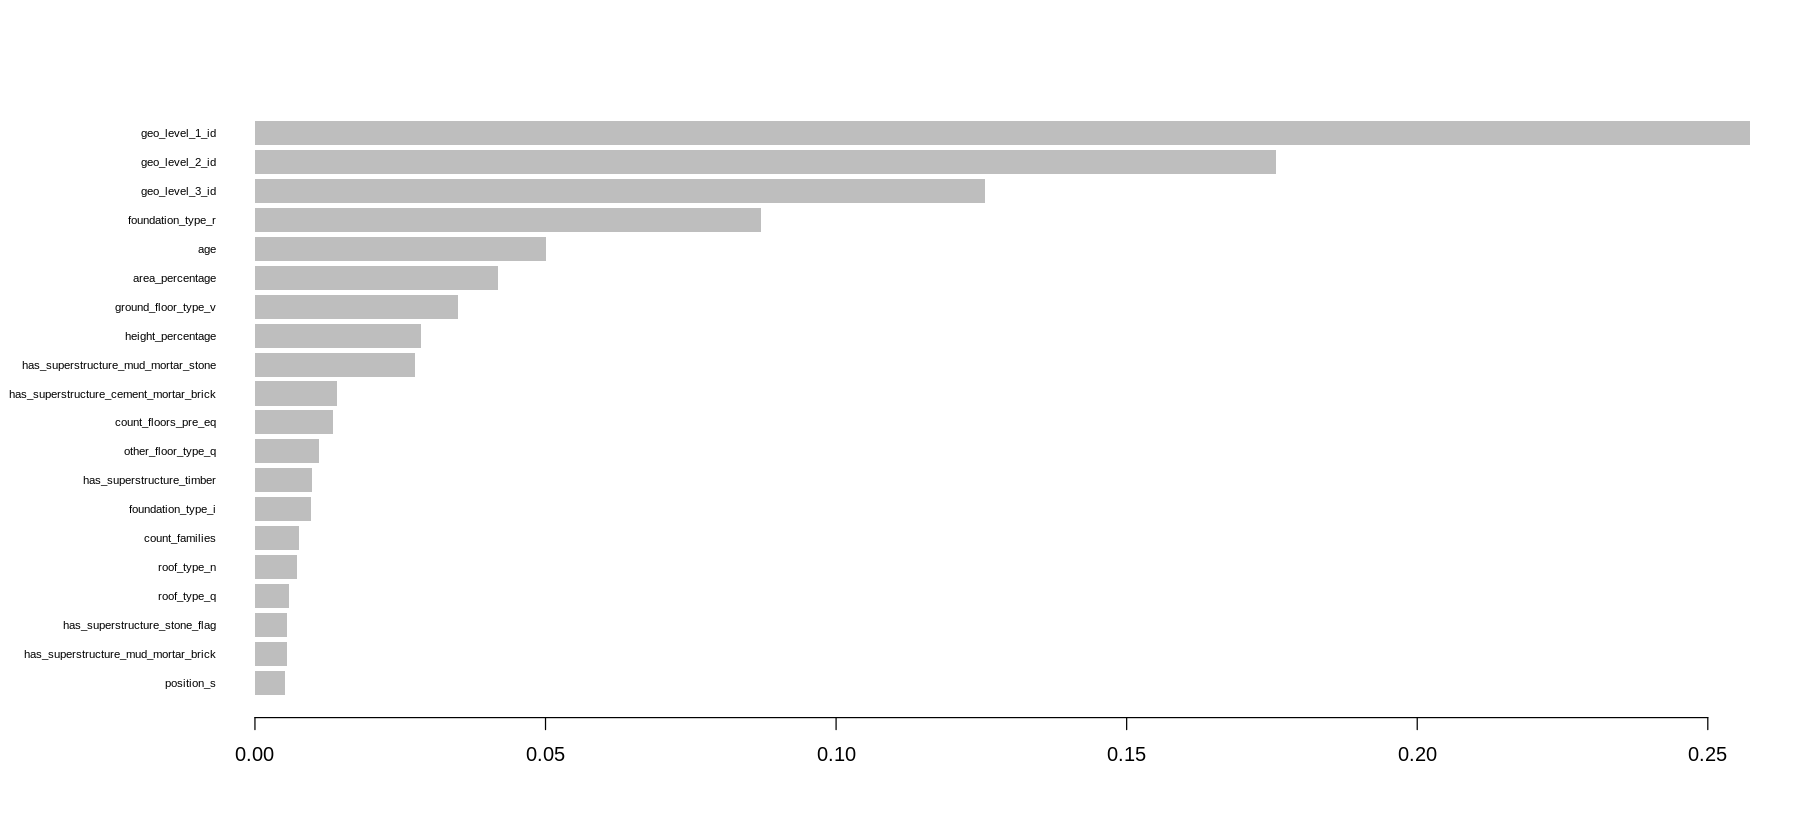

In [ ]:
mat <- xgb.importance (feature_names = colnames(train_matrix),model = xgb_model_submission)
xgb.plot.importance (importance_matrix = mat[1:20])

#Ranking of the features in terms of relevance

We use Random Forest with only 10 trees because otherwise it would take too much time ( $\approx{23h}$). The entropy is computed the same way as in the Section 2.11.3 of the Handbook. Note that Random forest predict function returns a matrix which contains for each test sample, the conditionnal probability that it belong to each class. So we have to loop over each row and compute the entropy for the row. At the end we take the mean of all entropies of the rows.

Compute the relevance with all features

In [ ]:
n_tree<-10
nb_features <- ncol(X)
idx <- sample(1:nrow(X))
split <- floor(nrow(X)/1.2) #80% for training and 20% for testing
entropy_X <- 0.0


X_tr <- X[idx[1:split],]
Y_tr <- as.factor(Y[idx[1:split]])

X_ts <- X[idx[(split+1):nrow(X)],]
Y_ts <- as.factor(Y[idx[(split+1):nrow(X)]])

model <- randomForest(x=X_tr,
                      y=Y_tr,
                      ntree=n_tree,
                      replace=T,
                      type="classification")


Y_pred <- predict(model, X_ts, type="prob")

entropy_per_sample <- numeric(nrow(Y_pred))

for (i in 1:nrow(Y_pred)){ # compute for each row H(Y|X)
    entropy_X_sample =0
    for(j in 1:3){ # minus (sum for each class j compute P(Y=j|X) * log2(P(Y=j|X)))
        if(Y_pred[i,j] != 0){ # If P(Y=j|X) == 0 we skip it because log2(0) = -inf and 0 times whatever is equal to 0
            entropy_X_sample = entropy_X_sample + Y_pred[i,j] * log2(Y_pred[i,j])
        }
    }
    entropy_per_sample[i] = -1 * entropy_X_sample
}

entropy_X  <- mean(entropy_per_sample) # This variable corresponds to H(Y|X)

Compute the relevance by removing one feature at the time (leave one out)

In [ ]:
bests<-numeric(nb_features)
entropy_Xj <- numeric(nb_features)


for(f in 1:(nb_features)){ # at each iterration we remove one feature

    X_tr <- X[idx[1:split],-f]
    Y_tr <- as.factor(Y[idx[1:split]])

    X_ts <- X[idx[(split+1):nrow(X)],-f]
    Y_ts <- as.factor(Y[idx[(split+1):nrow(X)]])


    model <- randomForest(x=X_tr,
                        y=Y_tr,
                        ntree=n_tree,
                        replace=T,
                        type="classification")

    Y_pred <- predict(model, X_ts, type="prob")

    entropy_per_sample_Xj <- numeric(nrow(Y_pred))

    for (i in 1:nrow(Y_pred)){# compute for each row H(Y|X-i)
        entropy_Xj_sample = 0
        for(j in 1:3){# minus (sum for each class j compute P(Y=j|X-i) * log2(P(Y=j|X-i)))
            if(Y_pred[i,j] != 0){# If P(Y=j|X-i) == 0 we skip it because log2(0) = -inf and 0 times whatever is equal to 0
                entropy_Xj_sample = entropy_Xj_sample + Y_pred[i,j] * log2(Y_pred[i,j])
            }
        }

      entropy_per_sample_Xj[i] = -1 * entropy_Xj_sample
    }

    entropy_Xj[f] = mean(entropy_per_sample_Xj[i])
    cat("Feature",f,"with relevance:",  entropy_Xj[f] - entropy_X,"\n")
    flush.console()
}


Feature 1 with entropy: -0.2358837 
Feature 2 with entropy: 0.1764116 
Feature 3 with entropy: -0.2358837 
Feature 4 with entropy: 0.01704877 
Feature 5 with entropy: 0.01704877 
Feature 6 with entropy: 0.2951207 
Feature 7 with entropy: -0.7048793 
Feature 8 with entropy: 0.01704877 
Feature 9 with entropy: 0.01704877 
Feature 10 with entropy: 0.1764116 
Feature 11 with entropy: -0.2358837 
Feature 12 with entropy: 0.1764116 
Feature 13 with entropy: -0.7048793 
Feature 14 with entropy: 0.4519003 
Feature 15 with entropy: 0.2170488 
Feature 16 with entropy: 0.2660713 
Feature 17 with entropy: 0.1764116 
Feature 18 with entropy: 0.2951207 
Feature 19 with entropy: 0.1764116 
Feature 20 with entropy: 0.01704877 
Feature 21 with entropy: 0.01704877 
Feature 22 with entropy: -0.7048793 
Feature 23 with entropy: 0.01704877 
Feature 24 with entropy: 0.1764116 
Feature 25 with entropy: 0.4519003 
Feature 26 with entropy: 0.1764116 
Feature 27 with entropy: -0.2358837 
Feature 28 with entropy

*Small mistake in the output, it not the entropy but the relevance...*

Now that we have the relevance for each feature, we sort them by increasing  relevance order. For exemple, so one of the most relevant features is `area_percentage`. The lower the relevance of a feature, the more important that feature is.

In [ ]:
stronghat=sort(entropy_Xj-entropy_X,decr=F,index=TRUE)
stronghat$ix
colnames(X)[stronghat$ix]

[1]  7 13 22 38 42 47 54 61 65  1  3 11 27 33 41 45 49 55 56 68  4  5  8  9 20
[26] 21 23 31 32 34 37 39 50 51 53 63 64 66  2 10 12 17 19 24 26 43 48 57 59 15
[51] 29 44 69 16 30 35 62 67  6 18 52 14 25 28 36 46 60 40 58

[1] "area_percentage"                       
 [2] "has_superstructure_mud_mortar_brick"   
 [3] "has_secondary_use_agriculture"         
 [4] "land_surface_condition_t"              
 [5] "plan_configuration_f"                  
 [6] "plan_configuration_s"                  
 [7] "other_floor_type_q"                    
 [8] "ground_floor_type_z"                   
 [9] "foundation_type_h"                     
[10] "building_id"                           
[11] "geo_level_2_id"                        
[12] "has_superstructure_stone_flag"         
[13] "has_secondary_use_industry"            
[14] "legal_ownership_status_r"              
[15] "plan_configuration_d"                  
[16] "plan_configuration_o"                  
[17] "position_j"                            
[18] "other_floor_type_s"                    
[19] "other_floor_type_x"                    
[20] "foundation_type_u"                     
[21] "geo_level_3_id"                        
[22] "count_floors_pre_eq"                   
[23] "height_percentage"                     
[24] "has_superstructure_adobe_mud"          
[25] "count_families"                        
[26] "has_secondary_use"                     
[27] "has_secondary_use_hotel"               
[28] "has_secondary_use_other"               
[29] "legal_ownership_status_a"              
[30] "legal_ownership_status_v"              
[31] "land_surface_condition_o"              
[32] "plan_configuration_a"                  
[33] "position_o"                            
[34] "position_s"                            
[35] "other_floor_type_j"                    
[36] "roof_type_q"                           
[37] "roof_type_x"                           
[38] "foundation_type_i"                     
[39] "geo_level_1_id"                        
[40] "has_superstructure_mud_mortar_stone"   
[41] "has_superstructure_cement_mortar_stone"
[42] "has_superstructure_rc_non_engineered"  
[43] "has_superstructure_other"              
[44] "has_secondary_use_rental"              
[45] "has_secondary_use_school"              
[46] "plan_configuration_m"                  
[47] "plan_configuration_u"                  
[48] "ground_floor_type_f"                   
[49] "ground_floor_type_v"                   
[50] "has_superstructure_timber"             
[51] "has_secondary_use_gov_office"          
[52] "plan_configuration_n"                  
[53] "foundation_type_w"                     
[54] "has_superstructure_bamboo"             
[55] "has_secondary_use_use_police"          
[56] "legal_ownership_status_w"              
[57] "roof_type_n"                           
[58] "foundation_type_r"                     
[59] "age"                                   
[60] "has_superstructure_rc_engineered"      
[61] "position_t"                            
[62] "has_superstructure_cement_mortar_brick"
[63] "has_secondary_use_institution"         
[64] "has_secondary_use_health_post"         
[65] "land_surface_condition_n"              
[66] "plan_configuration_q"                  
[67] "ground_floor_type_x"                   
[68] "plan_configuration_c"                  
[69] "ground_floor_type_m"

#Conclusion
Here is the table which summarizes the results we obtain with the different models.

|                       	| F1-score  	| Accuracy  	| Driven data 	|
|-----------------------	|-----------	|-----------	|-------------	|
|     Decision Tree     	| 0.4454      | 0.6404      |   0.6380     	|
|  Decision Tree + mRMR 	| 0.4454    	| 0.6404      |   0.6380   	  |
|     Random Forest     	| 0.5344   	  | 0.7123 	    |   0.7167      |
|  Random Forest + mRMR 	| 0.4885   	  | 0.6892      |   0.6902      |
|     Neural Network    	| 0.4631      | 0.6825  	  |   0.6817      |
| Neural Network + mRMR 	| 0.4406      | 0.6722      |   0.6790      |
|        XGBoost        	| 0.5842 	    | 0.7422 	    |   0.7464      |
|     XGBoost + mRMR    	| 0.5630  	  | 0.7275  	  |   0.7365      |


We can see that the best model for all metrics even in *Drivendata* is XGBoost without feature selection. Random forest is not far behind, but it is also  better without feature selection. Moreover, Decision tree is the worst model we have, but also the simplest. In the other hand, Neural network is a more complex model, but it results are disappointing.

We can also note that feature selection (mRMR) in our case did not improves performances but can be useful to improve computation time. However the two best model we have a.k.a XGBoost and Random Forest do their own features selection. We really want to do forward selection but the execution time was astromic.

***Final model : XGBoost without feature selection ( F1-score 0.5946 | Accuracy	 0.7475 )***